Tutor Interaction Form NLP and Analysis

In [1]:
"""
This code imports a variety of libraries and modules for advanced text processing, analysis, and visualization tasks. 
It uses pandas for data manipulation and spacy for natural language processing tasks like tokenization and part-of-speech 
tagging, while nltk provides tools for tokenization, stopword removal, and sentiment analysis using VADER. Gensim and 
sklearn modules such as CountVectorizer and LatentDirichletAllocation enable topic modeling and document similarity analysis. 
The re library is used for regular expression-based text preprocessing, and matplotlib, seaborn, and wordcloud facilitate 
visualizations such as word clouds and statistical plots. Clustering and dimensionality reduction for visualizing 
high-dimensional text data are handled by KMeans and t-SNE from sklearn. Though transformers.pipeline is imported, 
it is not currently in use, suggesting potential future integration of transformer-based models like BERT or GPT for 
more sophisticated natural language tasks.
"""

import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim import corpora
from nltk.corpus import stopwords
import nltk
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline ### NOT IN USE

In [2]:
"""
This code reads an Excel file containing data and loads it into a pandas DataFrame for analysis. 
The file path is specified as a raw string to handle special characters (e.g., backslashes in Windows paths). 
The pd.read_excel function is used to import data from the specified sheet (Sheet4) of the Excel file into the DataFrame (df). 
The df.head() function is then called to display the first few rows of the DataFrame, providing a quick preview of the loaded data for validation and exploration.
"""

file_path = r"C:\Users\kzanc\Honors Fellow Project\BMC Tutor Interaction Data Fall 22 - Spring 24 (test data).xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet4')
df.head()

,ID,Tutor,Student,Date,Time,Attend,Attend Bin,Returner,Returner Bin,Class,...,Purpose_2,Purpose_3,Working_HW_Encoded,Review_Course_Material_Encoded,Prep_exam_encoded,Other_encoded,LEARNING STAGE,SUCCESS,RECOMMENDATION,SUMMARY
0,1084,A19ACB61,BE9C222A,2023-09-20,4:30pm,Yes,1,Yes,1.0,STP 226;,...,NaN,NaN,1,0,0,0,The student understood basic concepts but need...,The student made a great deal of progress,practice problems,P(a and b) and P(a or b) when looking at list...
1,87,B6F940B1,FBF5D682,2022-09-16,1:30pm,Yes,1,Yes,1.0,MAT 211;,...,Reviewing course material,NaN,1,1,0,0,The student was proficient in basic concepts b...,The student made some progress,Ask those questions to your teacher- how do we...,...the Lagrangian? Multiple problems with the ...
2,1505,B6F940B1,65DA7CAB,2023-11-03,12:00pm,Yes,1,No,0.0,MAT 266;,...,NaN,NaN,1,0,0,0,The student understood basic concepts but need...,The student made some progress,NaN,(Did I already fill this out?? I can't remembe...
3,541,B6F940B1,935BBB0E,2023-01-22,5:30pm,Yes,1,Yes,1.0,MAT 267;,...,NaN,NaN,1,0,0,0,The student understood basic concepts but need...,The student made some progress,NaN,(Filling out the form for both the 5:30 and 7:...
4,50,B6F940B1,129ACBD9,2022-09-09,11:30am,Yes,1,No,0.0,MAT 272;,...,NaN,NaN,1,0,0,0,The student understood basic concepts but need...,The student made some progress,"With Calc III, the Internet is definitely your...",(I gotta be honest- I think sessions go well w...


In [3]:
"""
This code converts a time column in a pandas DataFrame (df) from a 12-hour format to a 24-hour military time format. 
The pd.to_datetime function is used to parse the Time column, specifying the format ('%I:%M%p') to handle 12-hour times with 
AM/PM markers. The .dt.strftime('%H:%M') method reformats the parsed time into a 24-hour format, storing the result in a new column, Military_Time. 
Finally, the df['Military_Time'] command displays the updated column, allowing verification of the transformation.
"""
df['Military_Time'] = pd.to_datetime(df['Time'], format='%I:%M%p').dt.strftime('%H:%M')
df['Military_Time']

0       16:30
1       13:30
2       12:00
3       17:30
4       11:30
        ...  
2736    13:00
2737    10:00
2738    13:30
2739    13:00
2740    15:30
Name: Military_Time, Length: 2741, dtype: object

In [6]:
"""
This code performs one-hot encoding on the Stage column of a pandas DataFrame (df) and integrates the encoded data back into the original DataFrame. 
The pd.get_dummies function generates binary indicator columns for each unique value in the Stage column, and the .astype(int) method ensures the values 
are stored as integers. The resulting encoded columns are concatenated with the original DataFrame using pd.concat along the horizontal axis (axis=1). 
Finally, df.head() is used to display the first few rows of the updated DataFrame, which now includes the one-hot encoded columns for verification and analysis.
"""

stage_encoded = pd.get_dummies(df['LEARNING STAGE'])
stage_encoded = stage_encoded.astype(int)
df = pd.concat([df, stage_encoded], axis=1)

df.head()

,ID,Tutor,Student,Date,Time,Attend,Attend Bin,Returner,Returner Bin,Class,...,Other_encoded,LEARNING STAGE,SUCCESS,RECOMMENDATION,SUMMARY,Military_Time,The student needed help understanding basic concepts,The student understood basic concepts but needed help putting them into practice,The student was proficient in basic concepts but needed help with advanced concepts,The student was proficient in the entire subject matter
0,1084,A19ACB61,BE9C222A,2023-09-20,4:30pm,Yes,1,Yes,1.0,STP 226;,...,0,The student understood basic concepts but need...,The student made a great deal of progress,practice problems,P(a and b) and P(a or b) when looking at list...,16:30,0,1,0,0
1,87,B6F940B1,FBF5D682,2022-09-16,1:30pm,Yes,1,Yes,1.0,MAT 211;,...,0,The student was proficient in basic concepts b...,The student made some progress,Ask those questions to your teacher- how do we...,...the Lagrangian? Multiple problems with the ...,13:30,0,0,1,0
2,1505,B6F940B1,65DA7CAB,2023-11-03,12:00pm,Yes,1,No,0.0,MAT 266;,...,0,The student understood basic concepts but need...,The student made some progress,NaN,(Did I already fill this out?? I can't remembe...,12:00,0,1,0,0
3,541,B6F940B1,935BBB0E,2023-01-22,5:30pm,Yes,1,Yes,1.0,MAT 267;,...,0,The student understood basic concepts but need...,The student made some progress,NaN,(Filling out the form for both the 5:30 and 7:...,17:30,0,1,0,0
4,50,B6F940B1,129ACBD9,2022-09-09,11:30am,Yes,1,No,0.0,MAT 272;,...,0,The student understood basic concepts but need...,The student made some progress,"With Calc III, the Internet is definitely your...",(I gotta be honest- I think sessions go well w...,11:30,0,1,0,0


In [7]:
"""
This code renames specific columns in a pandas DataFrame (df) to more concise or descriptive labels. The df.rename method is used, 
where a dictionary maps the original column names to their new names. For example, "The student needed help understanding basic concepts" 
is renamed to "Stage1", and similar mappings are applied for "Stage2", "Stage3", and "Stage4". This improves readability and simplifies subsequent 
data processing or analysis. Finally, df.head() is called to display the first few rows of the updated DataFrame, allowing verification of the renaming operation.
"""

df = df.rename(columns={'The student needed help understanding basic concepts': 'Stage1',
                        'The student understood basic concepts but needed help putting them into practice': 'Stage2',
                        'The student was proficient in basic concepts but needed help with advanced concepts': 'Stage3',
                        'The student was proficient in the entire subject matter': 'Stage4'})
df.head()

,ID,Tutor,Student,Date,Time,Attend,Attend Bin,Returner,Returner Bin,Class,...,Other_encoded,LEARNING STAGE,SUCCESS,RECOMMENDATION,SUMMARY,Military_Time,Stage1,Stage2,Stage3,Stage4
0,1084,A19ACB61,BE9C222A,2023-09-20,4:30pm,Yes,1,Yes,1.0,STP 226;,...,0,The student understood basic concepts but need...,The student made a great deal of progress,practice problems,P(a and b) and P(a or b) when looking at list...,16:30,0,1,0,0
1,87,B6F940B1,FBF5D682,2022-09-16,1:30pm,Yes,1,Yes,1.0,MAT 211;,...,0,The student was proficient in basic concepts b...,The student made some progress,Ask those questions to your teacher- how do we...,...the Lagrangian? Multiple problems with the ...,13:30,0,0,1,0
2,1505,B6F940B1,65DA7CAB,2023-11-03,12:00pm,Yes,1,No,0.0,MAT 266;,...,0,The student understood basic concepts but need...,The student made some progress,NaN,(Did I already fill this out?? I can't remembe...,12:00,0,1,0,0
3,541,B6F940B1,935BBB0E,2023-01-22,5:30pm,Yes,1,Yes,1.0,MAT 267;,...,0,The student understood basic concepts but need...,The student made some progress,NaN,(Filling out the form for both the 5:30 and 7:...,17:30,0,1,0,0
4,50,B6F940B1,129ACBD9,2022-09-09,11:30am,Yes,1,No,0.0,MAT 272;,...,0,The student understood basic concepts but need...,The student made some progress,"With Calc III, the Internet is definitely your...",(I gotta be honest- I think sessions go well w...,11:30,0,1,0,0


In [8]:
"""
This code applies one-hot encoding to the Success column in a pandas DataFrame (df) and incorporates the resulting encoded columns back into the original DataFrame. 
The pd.get_dummies function creates binary indicator columns for each unique value in the Success column, and .astype(int) ensures the values are stored as integers. 
The newly created columns are then concatenated with the original DataFrame using pd.concat along the horizontal axis (axis=1). Finally, df.head() displays the first few 
rows of the updated DataFrame, showcasing the new one-hot encoded Success columns for verification.
"""

success_encoded = pd.get_dummies(df['SUCCESS'])
success_encoded = success_encoded.astype(int)
df = pd.concat([df, success_encoded], axis=1)

df.head()

,ID,Tutor,Student,Date,Time,Attend,Attend Bin,Returner,Returner Bin,Class,...,RECOMMENDATION,SUMMARY,Military_Time,Stage1,Stage2,Stage3,Stage4,The student did not make much progress,The student made a great deal of progress,The student made some progress
0,1084,A19ACB61,BE9C222A,2023-09-20,4:30pm,Yes,1,Yes,1.0,STP 226;,...,practice problems,P(a and b) and P(a or b) when looking at list...,16:30,0,1,0,0,0,1,0
1,87,B6F940B1,FBF5D682,2022-09-16,1:30pm,Yes,1,Yes,1.0,MAT 211;,...,Ask those questions to your teacher- how do we...,...the Lagrangian? Multiple problems with the ...,13:30,0,0,1,0,0,0,1
2,1505,B6F940B1,65DA7CAB,2023-11-03,12:00pm,Yes,1,No,0.0,MAT 266;,...,NaN,(Did I already fill this out?? I can't remembe...,12:00,0,1,0,0,0,0,1
3,541,B6F940B1,935BBB0E,2023-01-22,5:30pm,Yes,1,Yes,1.0,MAT 267;,...,NaN,(Filling out the form for both the 5:30 and 7:...,17:30,0,1,0,0,0,0,1
4,50,B6F940B1,129ACBD9,2022-09-09,11:30am,Yes,1,No,0.0,MAT 272;,...,"With Calc III, the Internet is definitely your...",(I gotta be honest- I think sessions go well w...,11:30,0,1,0,0,0,0,1


In [9]:
"""
This code renames specific columns in a pandas DataFrame (df) to more concise or standardized labels for better readability. The df.rename method is used, 
with a dictionary mapping the original column names to new names: "The student did not make much progress" is renamed to "Success1", "The student made some progress" to 
"Success2", and "The student made a great deal of progress" to "Success3". This simplifies column references for subsequent analysis or operations. The resulting DataFrame, 
with updated column names, is then displayed using df.
"""

df = df.rename(columns={'The student did not make much progress': 'Success1',
                        'The student made some progress': 'Success2',
                        'The student made a great deal of progress': 'Success3'})
df

,ID,Tutor,Student,Date,Time,Attend,Attend Bin,Returner,Returner Bin,Class,...,RECOMMENDATION,SUMMARY,Military_Time,Stage1,Stage2,Stage3,Stage4,Success1,Success3,Success2
0,1084,A19ACB61,BE9C222A,2023-09-20,4:30pm,Yes,1,Yes,1.0,STP 226;,...,practice problems,P(a and b) and P(a or b) when looking at list...,16:30,0,1,0,0,0,1,0
1,87,B6F940B1,FBF5D682,2022-09-16,1:30pm,Yes,1,Yes,1.0,MAT 211;,...,Ask those questions to your teacher- how do we...,...the Lagrangian? Multiple problems with the ...,13:30,0,0,1,0,0,0,1
2,1505,B6F940B1,65DA7CAB,2023-11-03,12:00pm,Yes,1,No,0.0,MAT 266;,...,NaN,(Did I already fill this out?? I can't remembe...,12:00,0,1,0,0,0,0,1
3,541,B6F940B1,935BBB0E,2023-01-22,5:30pm,Yes,1,Yes,1.0,MAT 267;,...,NaN,(Filling out the form for both the 5:30 and 7:...,17:30,0,1,0,0,0,0,1
4,50,B6F940B1,129ACBD9,2022-09-09,11:30am,Yes,1,No,0.0,MAT 272;,...,"With Calc III, the Internet is definitely your...",(I gotta be honest- I think sessions go well w...,11:30,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,2710,CCC77167,210D4846,2024-04-29,1:00pm,No,0,NaN,NaN,NaN,...,NaN,NaN,13:00,0,0,0,0,0,0,0
2737,2736,D91C538B,EFB69DEC,2024-05-01,10:00am,No,0,NaN,NaN,NaN,...,NaN,NaN,10:00,0,0,0,0,0,0,0
2738,2743,A19ACB61,EFB69DEC,2024-05-01,1:30pm,No,0,NaN,NaN,NaN,...,NaN,NaN,13:30,0,0,0,0,0,0,0
2739,2746,A19ACB61,6714B91B,2024-05-02,1:00pm,No,0,NaN,NaN,NaN,...,NaN,NaN,13:00,0,0,0,0,0,0,0


In [10]:
### Display the column names in df

df.columns

Index(['ID', 'Tutor', 'Student', 'Date', 'Time', 'Attend', 'Attend Bin',
       'Returner', 'Returner Bin', 'Class', 'Class 1', 'Class 2', 'MAT 117',
       'MAT 142', 'MAT 170', 'MAT 171', 'MAT 210', 'MAT 211', 'MAT 242',
       'MAT 243', 'MAT 251', 'MAT 265', 'MAT 266', 'MAT 267', 'MAT 270',
       'MAT 271', 'MAT 272', 'MAT 275', 'MAT 300', 'MAT342_343', 'STP 226',
       'STP 231', 'ECN 221_231', 'IEE 380', 'Other', 'Purpose', 'Purpose_1',
       'Purpose_2', 'Purpose_3', 'Working_HW_Encoded',
       'Review_Course_Material_Encoded', 'Prep_exam_encoded', 'Other_encoded',
       'LEARNING STAGE', 'SUCCESS', 'RECOMMENDATION', 'SUMMARY',
       'Military_Time', 'Stage1', 'Stage2', 'Stage3', 'Stage4', 'Success1',
       'Success3', 'Success2'],
      dtype='object')

In [13]:
"""
This code selects specific columns from a DataFrame df and creates a new DataFrame, df_final, containing details related to 
tutoring sessions. The selected columns include identifiers such as ID, Tutor, Student, and Date, along with session details 
like Military_Time, attendance and returner bins (Attend Bin, Returner Bin), and encoded activities 
(Working_HW_Encoded, Review_Course_Material_Encoded, Prep_exam_encoded, Other_encoded). It also includes academic course 
codes (e.g., MAT 117, MAT 210, MAT 265, etc.), progress stages (Stage1 to Stage4), success metrics (Success1 to Success3), 
and additional fields like RECOMMENDATION and SUMMARY. Finally, the code displays the first few rows of the newly created 
DataFrame using df_final.head().
"""

df_final = df[['ID', 'Tutor', 'Student', 'Date', 'Military_Time','Attend Bin','Returner Bin','MAT 117',
       'MAT 142', 'MAT 170', 'MAT 171', 'MAT 210', 'MAT 211', 'MAT 242',
       'MAT 243', 'MAT 251', 'MAT 265', 'MAT 266', 'MAT 267', 'MAT 270',
       'MAT 271', 'MAT 272', 'MAT 275', 'MAT 300', 'MAT342_343', 'STP 226',
       'STP 231', 'ECN 221_231', 'IEE 380', 'Other','Working_HW_Encoded',
       'Review_Course_Material_Encoded', 'Prep_exam_encoded', 'Other_encoded','Stage1',
       'Stage2', 'Stage3', 'Stage4', 'Success1', 'Success2', 'Success3','RECOMMENDATION', 'SUMMARY']]
df_final.head()

,ID,Tutor,Student,Date,Military_Time,Attend Bin,Returner Bin,MAT 117,MAT 142,MAT 170,...,Other_encoded,Stage1,Stage2,Stage3,Stage4,Success1,Success2,Success3,RECOMMENDATION,SUMMARY
0,1084,A19ACB61,BE9C222A,2023-09-20,16:30,1,1.0,0,0,0,...,0,0,1,0,0,0,0,1,practice problems,P(a and b) and P(a or b) when looking at list...
1,87,B6F940B1,FBF5D682,2022-09-16,13:30,1,1.0,0,0,0,...,0,0,0,1,0,0,1,0,Ask those questions to your teacher- how do we...,...the Lagrangian? Multiple problems with the ...
2,1505,B6F940B1,65DA7CAB,2023-11-03,12:00,1,0.0,0,0,0,...,0,0,1,0,0,0,1,0,NaN,(Did I already fill this out?? I can't remembe...
3,541,B6F940B1,935BBB0E,2023-01-22,17:30,1,1.0,0,0,0,...,0,0,1,0,0,0,1,0,NaN,(Filling out the form for both the 5:30 and 7:...
4,50,B6F940B1,129ACBD9,2022-09-09,11:30,1,0.0,0,0,0,...,0,0,1,0,0,0,1,0,"With Calc III, the Internet is definitely your...",(I gotta be honest- I think sessions go well w...


I have given the spreadsheet with the other resources, so there is no need to run this cell again!

In [14]:
"""
This code exports the DataFrame df_final to an Excel file located at the specified path. The data is written to a
single sheet named "Sheet1," and the index=False parameter ensures that the row index is not included in the output file. 
This allows for clean and structured data storage in Excel format for further analysis or sharing.
"""

df_final.to_excel(r'C:\Users\kzanc\Honors Fellow Project\output_with_sheet_FINAL.xlsx', sheet_name='Sheet1', index=False)

In [ ]:
"""
This code begins by defining a file path (file_path) to an Excel file (output_with_sheet.xlsx) using a raw string to correctly handle the backslashes in the Windows directory path. 
The file is then loaded into a pandas DataFrame (df_output) using the pd.read_excel function, which reads the contents of the Excel file. By default, it loads the first sheet unless otherwise specified. 
The df_output.head() method is used to preview the first few rows of the loaded DataFrame, confirming that the data was imported correctly. A new DataFrame (dfdf) is then created, and the Translated_Summary 
column from df_output is extracted and assigned to a new column named text in dfdf. This isolates the relevant textual data, preparing it for further processing or analysis.
"""


file_path = r'C:\Users\kzanc\Honors Fellow Project\output_with_sheet_FINAL.xlsx'
df_output = pd.read_excel(file_path)
df_output.head()
dfdf = pd.DataFrame()
dfdf['text']= df_output['Translated_Summary']
dfdf

,text
0,probability of both events happening and proba...
1,Multiple problems with the Lagrangian.
2,Using ratio test to determine whether a series...
3,Using cross product and dot product formulas a...
4,Went through several WebWork problems on findi...
...,...
2736,NaN
2737,NaN
2738,NaN
2739,NaN


In [20]:
dfdf = dfdf.dropna()

In [21]:
df_output

,ID,Tutor,Student,Date,Military_Time,Attend Bin,Returner Bin,MAT 117,MAT 142,MAT 170,...,Stage1,Stage2,Stage3,Stage4,Success1,Success2,Success3,RECOMMENDATION,SUMMARY,Translated_Summary
0,1084,A19ACB61,BE9C222A,2023-09-20,16:30,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,practice problems,P(a and b) and P(a or b) when looking at list...,probability of both events happening and proba...
1,87,B6F940B1,FBF5D682,2022-09-16,13:30,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Ask those questions to your teacher- how do we...,...the Lagrangian? Multiple problems with the ...,Multiple problems with the Lagrangian.
2,1505,B6F940B1,65DA7CAB,2023-11-03,12:00,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,(Did I already fill this out?? I can't remembe...,Using ratio test to determine whether a series...
3,541,B6F940B1,935BBB0E,2023-01-22,17:30,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,(Filling out the form for both the 5:30 and 7:...,Using cross product and dot product formulas a...
4,50,B6F940B1,129ACBD9,2022-09-09,11:30,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,"With Calc III, the Internet is definitely your...",(I gotta be honest- I think sessions go well w...,Went through several WebWork problems on findi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,2710,CCC77167,210D4846,2024-04-29,13:00,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2737,2736,D91C538B,EFB69DEC,2024-05-01,10:00,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2738,2743,A19ACB61,EFB69DEC,2024-05-01,13:30,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2739,2746,A19ACB61,6714B91B,2024-05-02,13:00,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This code sets up a pipeline for cleaning and preprocessing text using NLTK and SpaCy. It starts by downloading NLTK stopwords and loading SpaCy's small English language model (en_core_web_sm). A custom list of stopwords (custom_words) is defined and added to the default NLTK stopwords set.

The function clean_text removes non-alphabetic characters, extra whitespace, and stopwords while converting the text to lowercase for standardization. The preprocess_text function builds on this by further tokenizing the cleaned text, lemmatizing tokens (reducing words to their base form), and filtering out additional stopwords, pronouns, and non-alphabetic tokens using SpaCy. Together, these functions prepare raw text for analysis by converting it into a cleaned and lemmatized tokenized format.

In [22]:
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')

stop_words = set(stopwords.words('english'))
custom_words = {"also", "find", "student", "still", "able", "want", "already", "session",
                'give', 'cancel', 'may', 'ground', 'high', 'x', 'etc', 'create', 'use',
                'late', 'thursday', 'switch',  '.', 'go', 'topic', 'say', 'want', 'another',
                'specifically', 'u', 'lot', 'leave', 'read', 'eg'
                } 
stop_words.update(custom_words)

def clean_text(text):
    """
    Clean the text by removing non-alphabetic characters, converting to lowercase, and filtering stopwords.
    """
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip().lower()
    words = text.split()
    filtered_words = [
        word for word in words if word not in stop_words
    ]
    return " ".join(filtered_words)

def preprocess_text(text):
    """
    Clean, tokenize, and lemmatize the text using SpaCy.
    """
    text = clean_text(text)
    doc = nlp(text)
    tokens = [
        token.lemma_
        for token in doc
        if token.lemma_ not in stop_words and token.lemma_ != "-PRON-" and token.is_alpha
    ]
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kzanc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


This code defines a text preprocessing pipeline using SpaCy to clean, tokenize, and lemmatize text. The clean_text2 function performs basic text cleaning by removing non-alphabetic characters, extra spaces, and converting text to lowercase for consistency. The preprocess_text2 function builds upon this by first cleaning the text using clean_text2, then processing it with SpaCy's NLP model (en_core_web_sm) to tokenize and lemmatize the text. It filters out stopwords, pronouns (-PRON-), and non-alphabetic tokens, returning the preprocessed text as a single string of lemmatized words. This setup is useful for preparing text for analysis or machine learning tasks.

In [23]:
nlp = spacy.load("en_core_web_sm")

def clean_text2(text):
    """
    Basic text cleaning: remove special characters, multiple spaces, and lowercase the text.
    """
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r"[^a-zA-Z\s]", "", text) 
    text = re.sub(r"\s+", " ", text) 
    return text.strip().lower() 

def preprocess_text2(text):
    """
    Preprocess the text: clean, tokenize, and lemmatize using SpaCy.
    """
    text = clean_text2(text)
    doc = nlp(text)
    tokens = [
        token.lemma_
        for token in doc
        if token.lemma_ not in stop_words and token.lemma_ != "-PRON-" and token.is_alpha
    ]
    return " ".join(tokens)

This code processes a large list of mathematical concepts to eliminate duplicates, ensuring a clean and unique collection of concepts. The script begins with the input list math_concepts, which contains a mixture of math-related terms in various formats. It initializes an empty list deduplicated_concepts to store the unique entries and a set seen to track normalized versions of the concepts for case-insensitive comparisons.

For each concept in the list, the script applies normalization steps: removing leading and trailing spaces with .strip(), converting to lowercase with .lower(), replacing hyphens (-) and underscores (_) with spaces to standardize formatting, and stripping out unnecessary characters such as single and double quotes. The normalized version is checked against the seen set to determine if it has already been encountered. If not, the original (trimmed but unmodified) concept is added to deduplicated_concepts, and its normalized version is added to seen.

Finally, the script prints the original number of concepts, the deduplicated count, and the resulting list of unique concepts. This ensures the output is a cleaned and non-redundant list.

In [24]:
math_concepts = [
    "Substitution method", "Area between curves", "Antiderivatives", "Applications of antiderivatives",
    "Second derivative", "Applications of second derivative", "Consumer surplus", "Producer surplus",
    "Diagonalization", "Differentiation", "Chain rule", "Implicit differentiation", "Exponentials", 
    "Logarithms", "Average value of functions", "Integrals", "Improper integrals", "Indefinite integrals",
    "Integration by parts", "Volumes of revolution", "Washers method", "Cylindrical shells method",
    "Lagrange multipliers", "Linear approximations", "Double integrals", "Linear transformations",
    "Binomial distributions", "Expected value", "Extrema (algebraic and graphical)", "Optimization",
    "Reduced row echelon form", "Determinants", "Matrix inversion", "Related rates", "Surfaces",
    "Surface area integrals", "Parametrization", "Derivatives", "Applications of derivatives",
    "Partial fraction decomposition", "Trigonometric substitution", "Growth functions", 
    "Implicit differentiation", "Optimization problems", "Riemann sums", "Linear programming",
    "Curl", "Divergence", "MATLAB basics", "For loops", "While loops", "If statements",
    "Creating .m files", "MATLAB", "Forward Euler method", 
    "Improved Euler methods", "Ordinary differential equations", "Stepwise functions",
    "Initial value problems", "Approximation error", "Lagrange functions", "LU decomposition",
    "Eigenvalues", "Eigenvectors", "Laplace transforms", "Step functions", "Matrix operations",
    "Row echelon form", "Gaussian reduction", "Matrix determinants", "Singular matrices",
    "Cramer’s Rule", "System of equations", "Vector calculus", "Vector projection", "Normal vectors",
    "Equation of a plane", "Optimization constraints", "Critical points", "Concavity", "Maxima and minima",
    "Spherical coordinates", "Cylindrical coordinates", "Line integrals", "Conservative vector fields",
    "Fundamental theorem of calculus", "Graphing inequalities", "Intersection of planes", 
    "Linear objective function", "Taylor series", "Maclaurin series", "Power series",
    "Ratio test", "Convergence tests", "Binomial distribution", "Poisson distribution",
    "Mean and variance", "Standard deviation", "Probability density functions", "Moment-generating functions",
    "Partial derivatives", "Multivariable functions", "Level curves", "Surface integrals",
    "Gradient vectors", "Hessian matrix", "Jacobian matrix", "U-substitution", "Integration techniques",
    "Trapezoidal rule", "Simpson's rule", "Parametric equations", "Polar coordinates",
    "Arc length", "Tangent lines", "Cartesian coordinates", "Log rules", "Exponential growth and decay",
    "Absolute extrema", "Relative extrema", "Marginal cost", "Marginal profit", "Marginal analysis",
    "Linear regression", "Residual sum of squares", "Confidence intervals", "Sample size estimation",
    "Chi-square tests", "Hypothesis testing", "Correlation coefficients", "Regression coefficients",
    "Mean squared error", "Bayes’ Theorem", "Conditional probability", "Probability tables",
    "Expected value calculation", "Z-scores", "Normal distribution", "Inverse Norm",
    "Probability complements", "Venn diagrams", "Tree diagrams", "Piecewise functions",
    "Sampling methods", "Population proportions", "Sample proportions", "T-distributions",
    "Degrees of freedom", "Null hypothesis", "Alternative hypothesis", "Linear independence",
    "Spanning sets", "Orthogonal vectors", "Orthonormal vectors", "Projection matrices",
    "Basis of vector spaces", "Change of basis", "Kernels and images", "Column spaces",
    "Row spaces", "Subspaces", "Linear maps", "Affine transformations", "Nonlinear transformations",
    "Cross product", "Dot product", "Determinant properties", "Inverse matrices",
    "Eigenvalue multiplicity", "Eigenvector determination", "Characteristic polynomials",
    "System of linear equations", "Gaussian elimination", "Gauss-Jordan elimination",
    "Matrix addition", "Matrix multiplication", "Matrix inversion", "Logarithmic differentiation",
    "Derivative of inverse functions", "First derivative test", "Second derivative test",
    "Concavity determination", "Critical point classification", "Implicit equations",
    "Rolle's Theorem", "Mean Value Theorem", "Fundamental theorem of algebra",
    "Polynomial long division", "Partial fraction decomposition", "Trig identities",
    "Trig substitution", "Inverse trig functions", "Hyperbolic functions", "Taylor expansions",
    "Maclaurin expansions", "Binomial series", "Series convergence", "Absolute convergence",
    "Conditional convergence", "Radius of convergence", "Interval of convergence",
    "Geometric series", "Harmonic series", "Telescoping series", "Power series differentiation",
    "Power series integration", "Fourier series", "Laplace transforms", "Inverse Laplace transforms",
    "Differential equations", "Separable differential equations", "Exact differential equations",
    "Nonlinear differential equations", "Boundary value problems", "Initial value problems",
    "Matrix algebra", "Rank of a matrix", "Nullity", "Vector spaces", "Span of vectors",
    "Linear combinations", "Homogeneous systems", "Non-homogeneous systems", "Least squares method",
    "Singular Value Decomposition", "Principal Component Analysis",
    "Orthogonal transformations", "Orthogonal projections", "Gram-Schmidt process",
    "QR decomposition", "LU decomposition", "Eigen decomposition", "Definite integrals",
    "Improper integrals", "Integration by parts", "Multiple integrals", "Surface integrals",
    "Triple integrals", "Line integrals", "Green's Theorem", "Stokes' Theorem", "Divergence Theorem",
    "Arc length of a curve", "Curvature of a curve", "Tangent vector", "Normal vector",
    "Binormal vector", "Frenet-Serret formulas", "Parametrization of curves",
    "Parametrization of surfaces", "Polar integrals", "Cartesian integrals", "Cylindrical integrals",
    "Spherical integrals", "Newton’s Method", "Linearization", "Error estimation",
    "Taylor polynomials", "Newton-Raphson method", "Secant method", "Bisection method",
    "Fixed-point iteration", "Numerical integration", "Trapezoidal rule", "Simpson’s rule",
    "Error bounds", "Interpolation", "Lagrange interpolation", "Newton interpolation",
    "Piecewise linear interpolation", "Spline interpolation", "Cubic splines",
    "Bernstein polynomials", "Bezier curves", "NURBS", "Differentiable manifolds",
    "Metric spaces", "Normed vector spaces", "Inner product spaces", "Hilbert spaces",
    "Banach spaces", "Fourier analysis", "Wavelet analysis", "Probability spaces",
    "Random variables", "Probability distributions", "Probability mass functions",
    "Probability density functions", "Cumulative distribution functions",
    "Expected value", "Variance", "Standard deviation", "Moment-generating functions",
    "Chebyshev’s inequality", "Markov chains", "Stationary distributions",
    "Gaussian distributions", "Poisson processes", "Binomial coefficients",
    "Combinations and permutations", "Factorials", "Stirling’s approximation",
    "Number theory", "Prime numbers", "Modular arithmetic", "Diophantine equations",
    "Euler’s totient function", "Chinese Remainder Theorem", "Greatest common divisors",
    "Least common multiples", "Continued fractions", "Irrational numbers",
    "Transcendental numbers", "Cantor sets", "Hausdorff dimension", "Fractals",
    "Topology", "Compactness", "Connectedness", "Path-connectedness", "Homeomorphisms",
    "Manifolds", "Tensors", "Lie groups", "Lie algebras", "Riemannian geometry",
    "Differential forms", "Exterior calculus", "Curvature tensors", "Geodesics",
    "Einstein summation convention", "Probability", "Webwork", "Partial Fractions", "Partial Fraction Decomposition", "u-sub", "u sub","u substitution",
    "Calculus three", "Calculus two", "Calculus one","integration by parts", "Cylindrical Shell", "power series", "population", "sample",
    "p-value", "t-test", "t test", "p value", "z test", "z-test", "z-score", "z score", "Algebra", "Calculus", "Mean Value Theorem", "Rolle's Theorem",
    "Extrema", "Statistics", "Matrix", "Determinant", "Vector", "Vectors", "Velocity", "Acceleration", "trapezoidal", "Trapezoidal rule", "Midpoint", "Midpoint rule",
    "trig sub", "trig substitution", "position", "speed", "Disk", "Disc", "Disk Method", "Disc Method", "Washer", "Washer method",
    "integral", "Polar", "Polar curves", "z-table", "z table", "Substitution method", "Integration by parts", "Trig substitution", "Partial fractions", 
    "Midpoint Rule", "Trapezoidal Rule", "Simpson’s Rule", "Approximation of definite integrals", 
    "Infinite interval", "Infinite discontinuity", "Area of a region enclosed by curves", 
    "Solids of revolution", "Washer method", "Disc method", "Shell method", 
    "Arc length of a curve", "Work to stretch a spring", "Work to empty a tank", 
    "Convergence and divergence of sequences", "Geometric series", "Test for divergence", 
    "Radius and interval of convergence", "Power series", "Taylor Series", "Maclaurin Series", 
    "Cartesian and parametric form conversion", "Tangent line on parametric curves", 
    "Area under parametric curves", "Arc length of parametric curves", 
    "Cartesian and polar form conversion", "Polar curve area", "Rules of Exponents", "Review", 
    "Properties of Functions", "Linear Functions", 
    "System of Equations", "Graphs of Functions", "Intermediate Functions", 
    "Composite Functions", "Quadratic Equations", "Polynomial Functions", 
    "Rational Functions", "Exponential Functions", "Logarithmic Functions", 
    "Transformations of Functions", "Inverse Functions", "Complex Numbers", "Quadratic Functions", 
    "combinatorics", "combination", "permutation", "expected value",
    "anova", "regression", 'Integral', 'Derivative', 'Matrix', 'Vector', 'Tensor', 'Scalar', 'Limit', 'Continuity', 'Differentiability',
    'Gradient', 'Hessian', 'Jacobian', 'Divergence', 'Curl', 'Partial derivative', 'Antiderivative', 'Indefinite integral',
    'Definite integral', 'Improper integral', 'Area under the curve', 'Arc length', 'Volume of revolution', 
    'Surface area', 'Parametric equations', 'Polar coordinates', 'Cartesian coordinates', 'Spherical coordinates', 
    'Cylindrical coordinates', 'Line integral', 'Surface integral', 'Triple integral', 'Green’s theorem', 'Stokes’ theorem',
    'Divergence theorem', 'Laplace transform', 'Inverse Laplace transform', 'Fourier transform', 'Inverse Fourier transform',
    'Z-transform', 'Eigenvalues', 'Eigenvectors', 'Characteristic polynomial', 'Diagonalization', 'Orthogonal matrix',
    'Orthonormal basis', 'Inner product', 'Outer product', 'Dot product', 'Cross product', 'Projection', 'Span', 
    'Linear independence', 'Basis', 'Subspace', 'Null space', 'Column space', 'Row space', 'Rank', 'Nullity', 
    'Linear map', 'Affine transformation', 'Matrix multiplication', 'Matrix addition', 'Matrix determinant', 
    'Matrix inversion', 'LU decomposition', 'QR decomposition', 'Singular Value Decomposition (SVD)', 'PCA',
    'Gram-Schmidt process', 'Vector space', 'Norm', 'Metric space', 'Topology', 'Compactness', 'Connectedness', 
    'Path connectedness', 'Homeomorphism', 'Manifold', 'Riemannian geometry', 'Geodesic', 'Curvature tensor', 
    'Differential form', 'Exterior calculus', 'Lie group', 'Lie algebra', 'Isomorphism', 'Group', 'Subgroup',
    'Ring', 'Field', 'Vector field', 'Scalar field', 'Algebra', 'Polynomial', 'Monomial', 'Binomial', 'Trinomial',
    'Rational function', 'Exponential function', 'Logarithmic function', 'Trigonometric function', 'Hyperbolic function',
    'Inverse trigonometric function', 'Absolute value', 'Piecewise function', 'Step function', 'Dirac delta function',
    'Heaviside function', 'Periodic function', 'Continuous function', 'Discontinuous function', 'Bounded function', 
    'Unbounded function', 'Increasing function', 'Decreasing function', 'Convex function', 'Concave function', 
    'Optimization', 'Critical point', 'Global maximum', 'Global minimum', 'Local maximum', 'Local minimum', 
    'Mean value theorem', 'Rolle’s theorem', 'Taylor series', 'Maclaurin series', 'Power series', 'Geometric series', 
    'Harmonic series', 'Convergence test', 'Divergence test', 'Ratio test', 'Root test', 'Integral test', 
    'Comparison test', 'Alternating series test', 'Absolute convergence', 'Conditional convergence', 'Radius of convergence',
    'Interval of convergence', 'Probability', 'Random variable', 'Probability distribution', 'Cumulative distribution function (CDF)',
    'Probability density function (PDF)', 'Expected value', 'Variance', 'Standard deviation', 'Skewness', 'Kurtosis',
    'Normal distribution', 'Binomial distribution', 'Poisson distribution', 'Exponential distribution', 'Uniform distribution',
    'T-distribution', 'Chi-square distribution', 'F-distribution', 'Multivariate normal distribution', 'Central limit theorem',
    'Law of large numbers', 'Hypothesis testing', 'Null hypothesis', 'Alternative hypothesis', 'P-value', 'T-test',
    'Z-test', 'ANOVA', 'Regression', 'Linear regression', 'Polynomial regression', 'Logistic regression', 'Correlation', 
    'Covariance', 'Residuals', 'Confidence interval', 'Prediction interval', 'Sample size estimation', 'Chi-square test',
    'Goodness-of-fit test', 'Contingency table', 'Bayes’ theorem', 'Conditional probability', 'Joint probability', 
    'Marginal probability', 'Independence', 'Mutually exclusive events', 'Markov chain', 'Stationary distribution',
    'Transition matrix', 'Stochastic process', 'Random walk', 'Time series analysis', 'Autocorrelation', 'Seasonality', 
    'Trend', 'Outlier detection', 'Fourier series', 'Wavelet transform', 'Spline interpolation', 'B-spline', 
    'Cubic spline', 'Lagrange interpolation', 'Newton interpolation', 'Bezier curve', 'Bernstein polynomial', 
    'Chebyshev polynomial', 'Legendre polynomial', 'Hermite polynomial', 'Laguerre polynomial', 'Tchebycheff inequality',
    'Stirling’s approximation', 'Factorial', 'Permutation', 'Combination', 'Binomial coefficient', 'Binomial theorem', 
    'Diophantine equation', 'Prime number', 'Composite number', 'Greatest common divisor (GCD)', 'Least common multiple (LCM)', 
    'Modulo operation', 'Congruence relation', 'Euler’s totient function', 'Chinese remainder theorem', 'Fermat’s little theorem',
    'Euclidean algorithm', 'Pythagorean theorem', 'Law of sines', 'Law of cosines', 'Heron’s formula', 'Area of a triangle', 
    'Circumference of a circle', 'Area of a circle', 'Volume of a sphere', 'Volume of a cone', 'Volume of a cylinder', 
    'Surface area of a sphere', 'Surface area of a cone', 'Surface area of a cylinder', 'Fractal', 'Cantor set', 
    'Sierpinski triangle', 'Mandelbrot set', 'Hausdorff dimension', 'Box-counting dimension', 'PDF', 'CDF', 
    'Absolute extrema', 'Relative extrema', 'Asymptote', 'Slant asymptote', 'Horizontal asymptote', 
    'Vertical asymptote', 'Critical number', 'Inflection point', 'Monotonic function', 'Increasing interval', 
    'Decreasing interval', 'Piecewise continuity', 'Parametric curve', 'Tangent line', 'Normal line', 
    'Osculating circle', 'Osculating plane', 'Polar curve', 'Elliptic integral', 'Hyperbolic integral', 
    'Principal value', 'Improper convergence', 'Series expansion', 'Partial sum', 'Infinite series', 
    'Telescoping series', 'Alternating series', 'Factorial series', 'Power law', 'Probability space', 
    'Conditional expectation', 'Bayesian inference', 'Markov property', 'Memoryless property', 
    'Poisson process', 'Queueing theory', 'Little’s law', 'Arrival rate', 'Service rate', 'Steady state', 
    'Renewal process', 'Mean recurrence time', 'Erlang distribution', 'Gamma distribution', 
    'Weibull distribution', 'Pareto distribution', 'Log-normal distribution', 'Cauchy distribution', 
    'Multinomial distribution', 'Hypergeometric distribution', 'Order statistics', 'Rank statistics', 
    'Sampling distribution', 'Bootstrap method', 'Jackknife method', 'Monte Carlo simulation', 
    'Bayesian updating', 'Maximum likelihood estimation', 'Least squares method', 
    'Gradient descent', 'Stochastic gradient descent', 'Newton’s method', 'Hessian matrix', 
    'Constrained optimization', 'Lagrange multiplier method', 'Penalty method', 'Barrier method', 
    'Simplex method', 'Duality', 'Primal-dual method', 'Convex optimization', 'Non-convex optimization', 
    'Piecewise linear approximation', 'Splitting methods', 'Fixed-point theorem', 'Contraction mapping', 
    'Banach fixed-point theorem', 'Krasnoselskii-Mann iteration', 'Brouwer fixed-point theorem', 
    'Chaos theory', 'Logistic map', 'Lorenz attractor', 'Bifurcation diagram', 'Feigenbaum constant', 
    'Fractal geometry', 'Self-similarity', 'Iterated function system', 'Cantor dust', 'Julia set', 
    'Doubling map', 'Topological space', 'Metric completion', 'Open set', 'Closed set', 'Boundary', 
    'Interior', 'Limit point', 'Accumulation point', 'Compact subset', 'Connected component', 
    'Path-connected space', 'Simply connected space', 'Fundamental group', 'Covering space', 
    'Topology of surfaces', 'Torus', 'Klein bottle', 'Mobius strip', 'Projective plane', 
    'Euler characteristic', 'Homotopy', 'Homology', 'Cohomology', 'De Rham cohomology', 
    'Exact sequence', 'Betti number', 'Manifold atlas', 'Differentiable structure', 'Fiber bundle', 
    'Vector bundle', 'Principal bundle', 'Tangent bundle', 'Normal bundle', 'Cotangent bundle', 
    'Lie derivative', 'Riemann curvature tensor', 'Ricci curvature', 'Scalar curvature', 
    'Einstein tensor', 'Geodesic equation', 'Geometric flow', 'Mean curvature flow', 
    'Ricci flow', 'Isoperimetric inequality', 'Minimal surface', 'Catenoid', 'Helicoid', 
    'Enneper surface', 'Clifford torus', 'Monge patch', 'Gaussian curvature', 
    'Hyperbolic geometry', 'Elliptic geometry', 'Euclidean geometry', 'Non-Euclidean geometry', 
    'Affine geometry', 'Projective geometry', 'Desargues theorem', 'Pappus theorem', 
    'Steiner theorem', 'Conic section', 'Ellipse', 'Hyperbola', 'Parabola', 'Focus-directrix property', 
    'Apollonius circle', 'Eccentricity', 'Degenerate conic', 'Dual conic', 'Tangential coordinates', 
    'Pluecker coordinates', 'Stereographic projection', 'Mercator projection', 'Geodetic coordinate system', 
    'Azimuthal equidistant projection', 'Conformal mapping', 'Riemann mapping theorem', 
    'Schwarz-Christoffel mapping', 'Mandelbrot set', 'Julia sets', 'Complex plane', 
    'Analytic continuation', 'Residue theorem', 'Cauchy integral formula', 'Contour integration', 
    'Laurent series', 'Taylor polynomial', 'Singular point', 'Essential singularity', 
    'Pole', 'Branch point', 'Logarithmic branch cut', 'Biholomorphic mapping', 'Riemann sphere', 
    'Modular arithmetic', 'Quadratic residue', 'Carmichael number', 'Fermat number', 
    'Prime factorization', 'Square-free integer', 'Mersenne prime', 'Perfect number', 
    'Friendly number', 'Sociable number', 'Harshad number', 'Kaprekar number', 
    'Magic number', 'Pseudoprime', 'Safe prime', 'Strong prime', 'Eisenstein integer', 
    'Gaussian integer', 'Totient function', 'Primitive root', 'Multiplicative order', 
    'Discrete logarithm', 'Elliptic curve cryptography', 'RSA algorithm', 'Diffie-Hellman key exchange', 
    'Zero-knowledge proof', 'Homomorphic encryption', 'Hash function', 'Digital signature', 
    'Block cipher', 'Stream cipher', 'Shannon entropy', 'Kolmogorov complexity', 
    'Minimum description length', 'Decision tree', 'Support vector machine', 'Neural network', 
    'Convolutional neural network', 'Recurrent neural network', 'Autoencoder', 'Generative adversarial network', 
    'Bayesian network', 'Markov random field', 'Factor graph', 'Hidden Markov model', 'Kalman filter', 
    'Particle filter', 'State space model', 'Control theory', 'Transfer function', 'Bode plot', 
    'Nyquist plot', 'Root locus', 'Pole-zero map', 'Linear system', 'Nonlinear system', 
    'System stability', 'Lyapunov function', 'Controllability', 'Observability', 'State feedback', 
    'Output feedback', 'Optimal control', 'LQR', 'LQG', 'Model predictive control', 'Robust control', 
    'Adaptive control', 'Sliding mode control', 'Dynamic programming', 'Bellman equation', 
    'Value iteration', 'Policy iteration', 'Reinforcement learning', 'Monte Carlo method', 
    'Q-learning', 'Deep Q-network', 'Actor-critic method', 'Policy gradient', 
    'Multi-armed bandit', 'Markov decision process', 'FTC', 'Fundamental Theorem of line integrals',
    'Limit', 'Continuity', 'Differentiability', 'Derivative', 'Partial derivative', 
    'Directional derivative', 'Implicit differentiation', 'Chain rule', 
    'Product rule', 'Quotient rule', 'Higher-order derivatives', 'Second derivative', 
    'Third derivative', 'Nth derivative', 'Mean value theorem', 'Rolle’s theorem', 
    'Extreme value theorem', 'Critical points', 'Local maxima', 'Local minima', 
    'Global maxima', 'Global minima', 'Concavity', 'Points of inflection', 
    'Increasing functions', 'Decreasing functions', 'Linear approximation', 
    'Differentials', 'Tangent line', 'Normal line', 'Slope of a curve', 
    'Curvature', 'Radius of curvature', 'Osculating circle', 'Velocity', 
    'Acceleration', 'Jerk', 'Snap', 'Position function', 'Displacement', 
    'Rectilinear motion', 'Motion along a curve', 'Rate of change', 
    'Average rate of change', 'Instantaneous rate of change', 'Optimization problems', 
    'Related rates', 'L’Hôpital’s rule', 'lhopitals' 'Indeterminate forms', 'Asymptotes', 
    'Horizontal asymptotes', 'Vertical asymptotes', 'Slant asymptotes', 
    'Limits at infinity', 'Infinite limits', 'Improper limits', 
    'Integral', 'Definite integral', 'Indefinite integral', 'Improper integral', 
    'Antiderivative', 'Fundamental theorem of calculus', 'Substitution method', 
    'U-substitution', 'Integration by parts', 'Partial fraction decomposition', 
    'Trigonometric integrals', 'Trigonometric substitution', 'Exponential integrals', 
    'Logarithmic integrals', 'Polynomial integrals', 'Rational function integrals', 
    'Piecewise integrals', 'Parametric integrals', 'Polar integrals', 
    'Numerical integration', 'Midpoint rule', 'Trapezoidal rule', 'Simpson’s rule', 
    'Error bounds for integrals', 'Area under a curve', 'Area between curves', 
    'Volume of solids', 'Volume of revolution', 'Disk method', 'Washer method', 
    'Shell method', 'Arc length', 'Surface area of revolution', 'Work done by a force', 
    'Center of mass', 'Moment of inertia', 'Centroid of a region', 
    'Improper convergence', 'Convergence tests for integrals', 'Sequence of functions', 
    'Series of functions', 'Taylor series', 'Maclaurin series', 'Power series', 
    'Radius of convergence', 'Interval of convergence', 'Uniform convergence', 
    'Fourier series', 'Fourier coefficients', 'Convergence of Fourier series', 
    'Partial sums of Fourier series', 'Bessel functions', 'Legendre polynomials', 
    'Dirichlet kernel', 'Orthogonality of sine and cosine', 'Partial derivatives', 
    'Gradient', 'Divergence', 'Curl', 'Level curves', 'Tangent plane', 
    'Normal vector', 'Directional derivative', 'Total derivative', 'Jacobian matrix', 
    'Hessian matrix', 'Chain rule for multivariable functions', 'Implicit differentiation for multivariable functions', 
    'Lagrange multipliers', 'Double integrals', 'Iterated integrals', 'Fubini’s theorem', 
    'Changing the order of integration', 'Triple integrals', 'Volume of a solid region', 
    'Change of variables', 'Jacobian determinant', 'Polar coordinates in integration', 
    'Cylindrical coordinates', 'Spherical coordinates', 'Surface integrals', 
    'Line integrals', 'Path independence', 'Conservative vector fields', 
    'Green’s theorem', 'Stokes’ theorem', 'Divergence theorem', 'Flux of a vector field', 
    'Work done along a curve', 'Arc length in parametric equations', 'Arc length in polar coordinates', 
    'Area in polar coordinates', 'Tangent lines for parametric curves', 
    'Tangent lines for polar curves', 'Area swept by a parametric curve', 
    'Taylor polynomials', 'Remainder theorem', 'Error analysis for Taylor series', 
    'Euler’s method', 'Improved Euler’s method', 'Runge-Kutta methods', 
    'Ordinary differential equations (ODEs)', 'Separable differential equations', 
    'Exact differential equations', 'Homogeneous differential equations', 
    'Nonhomogeneous differential equations', 'Linear differential equations', 
    'Higher-order differential equations', 'Initial value problems', 
    'Boundary value problems', 'Systems of ODEs', 'Phase plane analysis', 
    'Autonomous systems', 'Stability of equilibrium points', 'Bifurcations', 
    'Fourier transform of functions', 'Laplace transform of functions', 
    'Inverse Laplace transform', 'Applications of Laplace transforms', 
    'Delta function', 'Heaviside step function', 'Convolution theorem', 
    'Green’s function', 'Numerical solutions to ODEs', 'Euler-Lagrange equation', 
    'Calculus of variations', 'Functional derivatives', 'Extremals', 
    'Variational problems with constraints', 'Action integral', 
    'Hamilton’s principle', 'Geodesics', 'Optimization in multivariable calculus', 
    'Critical points in multivariable calculus', 'Saddle points', 'Min-max tests for multivariable functions', 
    'Differentiable manifolds', 'Charts and atlases', 'Vector fields on manifolds', 
    'Tensors in calculus', 'Differential forms', 'Exterior derivative', 
    'Stokes’ theorem in differential forms', 'Integral curves of vector fields', 
    'Lie derivatives', 'Partial differential equations (PDEs)', 
    'Separation of variables in PDEs', 'Heat equation', 'Wave equation', 
    'Laplace equation', 'Boundary conditions for PDEs', 'Dirichlet boundary conditions', 
    'Neumann boundary conditions', 'Mixed boundary conditions', 'Fourier analysis of PDEs', 
    'Harmonic functions', 'Eigenfunction expansions', 'Orthogonal expansions', 
    'Energy methods in PDEs', 'Variational principles in PDEs', 
    'Green’s identities', 'Poisson’s equation', 'Applications of calculus in physics', 
    'Applications of calculus in engineering', 'Applications of calculus in economics', 'ODE', 'PDE',
    'Mean', 'Median', 'Mode', 'Range', 'Variance', 'Standard deviation', 'Interquartile range', 
    'Skewness', 'Kurtosis', 'Histogram', 'Box plot', 'Dot plot', 'Stem-and-leaf plot', 
    'Frequency distribution', 'Relative frequency', 'Cumulative frequency', 
    'Quantile', 'Percentile', 'Decile', 'Quartile', 'Outlier', 'Z-score', 
    'Standard score', 'Empirical rule', 'Chebyshev’s inequality', 'Probability', 
    'Conditional probability', 'Bayes’ theorem', 'Mutually exclusive events', 
    'Independent events', 'Dependent events', 'Complement rule', 'Addition rule', 
    'Multiplication rule', 'Joint probability', 'Marginal probability', 
    'Discrete random variable', 'Continuous random variable', 'Probability mass function (PMF)', 
    'Probability density function (PDF)', 'Cumulative distribution function (CDF)', 
    'Uniform distribution', 'Binomial distribution', 'Poisson distribution', 
    'Geometric distribution', 'Hypergeometric distribution', 'Negative binomial distribution', 
    'Exponential distribution', 'Normal distribution', 'Standard normal distribution', 
    'Skewed distribution', 'Multinomial distribution', 'Pareto distribution', 
    'Log-normal distribution', 'Beta distribution', 'Gamma distribution', 
    'Chi-square distribution', 'T-distribution', 'F-distribution', 
    'Sampling distribution', 'Central limit theorem', 'Law of large numbers', 
    'Sampling methods', 'Simple random sampling', 'Stratified sampling', 
    'Systematic sampling', 'Cluster sampling', 'Convenience sampling', 
    'Judgment sampling', 'Quota sampling', 'Snowball sampling', 
    'Bias', 'Selection bias', 'Response bias', 'Non-response bias', 
    'Measurement bias', 'Sampling error', 'Non-sampling error', 
    'Point estimation', 'Interval estimation', 'Confidence interval', 
    'Margin of error', 'Hypothesis testing', 'Null hypothesis', 
    'Alternative hypothesis', 'P-value', 'Type I error', 'Type II error', 
    'Significance level', 'Power of a test', 'Effect size', 
    'T-test', 'One-sample T-test', 'Two-sample T-test', 'Paired T-test', 
    'Z-test', 'Chi-square test', 'Goodness-of-fit test', 
    'Test of independence', 'Test of homogeneity', 'F-test', 
    'ANOVA (Analysis of Variance)', 'One-way ANOVA', 'Two-way ANOVA', 
    'Repeated measures ANOVA', 'Post-hoc test', 'Tukey’s test', 
    'Regression analysis', 'Linear regression', 'Multiple regression', 
    'Logistic regression', 'Polynomial regression', 'Stepwise regression', 
    'Ridge regression', 'Lasso regression', 'Elastic net regression', 
    'Correlation', 'Pearson correlation', 'Spearman correlation', 
    'Kendall tau correlation', 'Partial correlation', 'Autocorrelation', 
    'Residuals', 'Coefficient of determination (R²)', 'Adjusted R²', 
    'Regression coefficient', 'Standard error of estimate', 
    'Confidence interval for regression', 'Prediction interval', 
    'Durbin-Watson statistic', 'Variance inflation factor (VIF)', 
    'Multicollinearity', 'Heteroscedasticity', 'Outlier detection', 
    'Cook’s distance', 'Leverage', 'Robust regression', 'Nonparametric statistics', 
    'Sign test', 'Wilcoxon signed-rank test', 'Mann-Whitney U test', 
    'Kruskal-Wallis test', 'Friedman test', 'Bootstrap method', 
    'Permutation test', 'Bayesian statistics', 'Prior distribution', 
    'Posterior distribution', 'Bayes factor', 'Credible interval', 
    'Markov chain Monte Carlo (MCMC)', 'Gibbs sampling', 'Metropolis-Hastings algorithm', 
    'Hierarchical modeling', 'Empirical Bayes', 'Conjugate prior', 
    'Multivariate statistics', 'Covariance matrix', 'Correlation matrix', 
    'Principal Component Analysis (PCA)', 'Factor analysis', 
    'Canonical correlation', 'Cluster analysis', 'K-means clustering', 
    'Hierarchical clustering', 'Agglomerative clustering', 'Divisive clustering', 
    'DBSCAN', 'Silhouette score', 'Discriminant analysis', 
    'Linear discriminant analysis (LDA)', 'Quadratic discriminant analysis (QDA)', 
    'Classification and regression tree (CART)', 'Random forest', 
    'Support vector machine (SVM)', 'Naive Bayes classifier', 'K-nearest neighbors (KNN)', 
    'Hidden Markov model (HMM)', 'Recommender systems', 'Time series analysis', 
    'Trend analysis', 'Seasonality', 'Stationarity', 'Autoregressive model (AR)', 
    'Moving average model (MA)', 'ARIMA model', 'SARIMA model', 
    'Exponential smoothing', 'Holt-Winters method', 'Cross-correlation', 
    'Granger causality', 'Forecasting', 'Bootstrap aggregating (Bagging)', 
    'Boosting', 'Gradient boosting', 'XGBoost', 'Hyperparameter tuning', 
    'Grid search', 'Random search', 'Bayesian optimization', 
    'Validation methods', 'Cross-validation', 'K-fold cross-validation', 
    'Stratified cross-validation', 'Leave-one-out cross-validation (LOOCV)', 
    'Holdout validation', 'Train-test split', 'Model evaluation', 
    'Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC curve', 
    'Area under the curve (AUC)', 'Confusion matrix', 'False positive rate', 
    'False negative rate', 'True positive rate', 'True negative rate', 
    'Likelihood ratio', 'Lift curve', 'Gain chart', 'Calibration curve', 
    'Imbalanced datasets', 'Oversampling', 'Undersampling', 
    'SMOTE (Synthetic Minority Oversampling Technique)', 
    'Feature selection', 'Feature engineering', 'Dimensionality reduction', 
    'Feature scaling', 'Normalization', 'Standardization', 'Outlier treatment', 
    'Missing data imputation', 'Hot deck imputation', 'Cold deck imputation', 
    'Mean imputation', 'Median imputation', 'Multiple imputation', 
    'Expectation-Maximization (EM)', 'Latent variable models', 
    'Hidden variables', 'Gaussian Mixture Model (GMM)', 'EM clustering', 
    'Bayesian information criterion (BIC)', 'Akaike information criterion (AIC)', 
    'Model selection', 'Overfitting', 'Underfitting', 'Bias-variance tradeoff', 
    'Cross-entropy', 'Entropy', 'KL divergence', 'Jensen-Shannon divergence', 
    'Gini impurity', 'Information gain', 'Decision boundary',
    'Variable', 'Constant', 'Coefficient', 'Term', 'Expression', 
    'Inequality', 'Linear equation', 'Quadratic equation', 'Cubic equation', 
    'Polynomial equation', 'Radical equation', 'Rational equation', 
    'Exponential equation', 'Logarithmic equation', 'System of equations', 
    'Linear inequality', 'Quadratic inequality', 'Rational inequality', 
    'Absolute value equation', 'Absolute value inequality', 'Slope', 
    'Y-intercept', 'X-intercept', 'Standard form', 'Slope-intercept form', 
    'Point-slope form', 'General form', 'Parallel lines', 'Perpendicular lines', 
    'Intercepts', 'Graphing', 'Linear function', 
    'Quadratic function', 'Cubic function', 'Polynomial function', 
    'Rational function', 'Radical function', 'Exponential function', 
    'Logarithmic function', 'Piecewise function', 'Step function', 
    'Domain', 'Range', 'Asymptote', 'Vertical asymptote', 
    'Horizontal asymptote', 'Slant asymptote', 'Vertex', 'Axis of symmetry', 
    'Roots', 'Zeroes', 'Solutions', 'Intercepts', 'Completing the square', 
    'Factoring', 'Synthetic division', 'Long division', 'Greatest common factor', 
    'Least common multiple', 'Prime factorization', 'Prime number', 
    'Composite number', 'Rational number', 'Irrational number', 
    'Complex number', 'Imaginary number', 'Real number', 
    'Integer', 'Whole number', 'Natural number', 'Monomial', 
    'Binomial', 'Trinomial', 'Polynomial', 'Degree of a polynomial', 
    'Leading coefficient', 'Constant term', 'Exponent', 'Base', 'Square', 'Cube', 'Square root', 'Cube root', 
    'Higher roots', 'Radical', 'Index of a radical', 'Radicand', 
    'Rationalizing the denominator', 'Conjugate', 'Exponential growth', 
    'Exponential decay', 'Logarithms', 'Logarithmic scale', 
    'Natural logarithm', 'Common logarithm', 'Change of base formula', 
    'Properties of logarithms', 'Distributive property', 'Associative property', 
    'Commutative property', 'Identity property', 'Inverse property', 
    'Zero property', 'Substitution', 'Elimination', 'Matrix', 
    'Determinant', 'Inverse matrix', 'Row reduction', 'Row echelon form', 
    'Reduced row echelon form', 'Gaussian elimination', 'Gauss-Jordan elimination', 
    'System of linear equations', 'Dependent system', 'Independent system', 
    'Consistent system', 'Inconsistent system', 'Augmented matrix', 
    'Linear independence', 'Vector', 'Scalar', 'Dot product', 
    'Cross product', 'Span', 'Basis', 'Null space', 
    'Column space', 'Row space', 'Linear transformation', 'Translation', 
    'Reflection', 'Rotation', 'Scaling', 'Stretching', 
    'Symmetry', 'Invariant', 'Symmetric matrix', 'Diagonal matrix', 
    'Identity matrix', 'Orthogonal matrix', 'Projection matrix', 
    'Eigenvalues', 'Eigenvectors', 'Characteristic equation', 
    'Diagonalization', 'Matrix multiplication', 'Matrix addition', 
    'System of inequalities', 'Feasible region', 'Linear programming', 
    'Objective function', 'Constraints', 'Vertex of a feasible region', 
    'Graphical method', 'Simplex method', 'Optimization', 
    'Critical points', 'Local maxima', 'Local minima', 
    'Global maxima', 'Global minima', 'Roots of polynomials', 
    'Rational root theorem', 'Descartes’ rule of signs', 
    'Factor theorem', 'Intermediate value theorem', 'Synthetic substitution', 
    'Complex conjugate root theorem', 'Irrational root theorem', 
    'Nested intervals', 'Quadratic formula', 'Discriminant', 
    'Sum of roots', 'Product of roots', 'Pascal’s triangle', 
    'Binomial theorem', 'Binomial expansion', 'Permutations', 
    'Combinations', 'Factorial', 'Probability', 'Expected value', 
    'Variance', 'Linear regression', 'Correlation', 
    'Least squares method', 'Residual', 'Slope of regression line', 
    'Intercept of regression line', 'Direct variation', 
    'Inverse variation', 'Joint variation', 'Combined variation', 
    'Proportionality', 'Ratio', 'Proportion', 'Cross multiplication', 
    'Scale factor', 'Similar triangles', 'Congruent triangles', 
    'Pythagorean theorem', 'Distance formula', 'Midpoint formula', 
    'Equation of a circle', 'Equation of a parabola', 'Equation of an ellipse', 
    'Equation of a hyperbola', 'Focus', 'Directrix', 'Latus rectum', 
    'Major axis', 'Minor axis', 'Conic sections', 'Ellipse', 
    'Hyperbola', 'Parabola', 'Discriminant of conics', 
    'Rotation of axes', 'Parametric equations', 'Cartesian coordinates', 
    'Polar coordinates', 'Slope field', 'Translation of axes', 
    'Absolute extrema', 'Relative extrema', 'Break-even analysis', 
    'Profit function', 'Revenue function', 'Cost function', 
    'Marginal profit', 'Marginal cost', 'Marginal revenue', 
    'Supply and demand', 'Elasticity', 'Inverse function', 
    'Composition of functions', 'One-to-one function', 
    'Onto function', 'Bijection', 'Injection', 'Surjection', 
    'Inverse relation', 'Function notation', 'Implicit function', 
    'Explicit function', 'Domain restrictions', 'Transformation of graphs', 'first derivative test', 'second derivative test'
]


deduplicated_concepts = []
seen = set()

for concept in math_concepts:
    normalized_concept = (
        concept.strip()
        .lower()
        .replace("-", " ")
        .replace("_", " ")
        .replace('"', "")
        .replace("'", "")
    )
    if normalized_concept not in seen:
        deduplicated_concepts.append(concept.strip()) 
        seen.add(normalized_concept) 

print(f"Original count: {len(math_concepts)}")
print(f"Deduplicated count: {len(deduplicated_concepts)}")
print(deduplicated_concepts)


Original count: 1688
Deduplicated count: 1362
['Substitution method', 'Area between curves', 'Antiderivatives', 'Applications of antiderivatives', 'Second derivative', 'Applications of second derivative', 'Consumer surplus', 'Producer surplus', 'Diagonalization', 'Differentiation', 'Chain rule', 'Implicit differentiation', 'Exponentials', 'Logarithms', 'Average value of functions', 'Integrals', 'Improper integrals', 'Indefinite integrals', 'Integration by parts', 'Volumes of revolution', 'Washers method', 'Cylindrical shells method', 'Lagrange multipliers', 'Linear approximations', 'Double integrals', 'Linear transformations', 'Binomial distributions', 'Expected value', 'Extrema (algebraic and graphical)', 'Optimization', 'Reduced row echelon form', 'Determinants', 'Matrix inversion', 'Related rates', 'Surfaces', 'Surface area integrals', 'Parametrization', 'Derivatives', 'Applications of derivatives', 'Partial fraction decomposition', 'Trigonometric substitution', 'Growth functions', 

This code implements a Named Entity Recognition (NER) process to identify mathematical concepts within a dataset. It begins by normalizing a list of deduplicated mathematical concepts, deduplicated_concepts, into lowercase and stores them in math_topics. This ensures consistency for case-insensitive matching.

The tag_entities() function takes a text input and identifies instances of these mathematical concepts within it. It first normalizes the input text to lowercase and uses Python’s regular expression library (re.finditer) to search for whole-word matches of each concept in math_topics. For each match, it appends a tuple containing the matched substring and the label "CONCEPT" to the list of entities.

The apply_ner_to_dataframe() function applies this entity recognition process to an entire column of a DataFrame. For each row, it retrieves the text from the specified column, checks if it is a valid string, and processes it using tag_entities(). The resulting list of entities for each text is stored in a new column, ensuring that each row's extracted entities are retained.

Lastly, the code preprocesses the text data in the column text of dfdf by calling the earlier preprocess_text2() function, which cleans, tokenizes, and lemmatizes the text. The processed text is stored in a new column, clean_text. The NER process is then applied to this cleaned text, and the extracted entities are stored in another new column, Extracted_Entities. This workflow enables efficient identification and tagging of predefined mathematical concepts within a text dataset, making it ready for downstream tasks such as text analysis or visualization.

In [25]:
math_topics = [concept.lower() for concept in deduplicated_concepts]

def tag_entities(text):
    entities = []
    normalized_text = text.lower()
    for concept in math_topics:
        for match in re.finditer(rf"\b{re.escape(concept)}\b", normalized_text):
            entities.append((text[match.start():match.end()], "CONCEPT"))
    return entities

def apply_ner_to_dataframe(df, column_name):
    entity_results = []
    for _, row in df.iterrows():
        text = row[column_name]
        if not isinstance(text, str):
            entity_results.append([])
            continue
        entities = tag_entities(text)
        entity_results.append(entities)
    return entity_results

dfdf['clean_text'] = dfdf['text'].astype(str).apply(preprocess_text2)
dfdf["Extracted_Entities"] = apply_ner_to_dataframe(dfdf, "clean_text")

C:\Users\kzanc\AppData\Local\Temp\ipykernel_34880\4144881754.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdf['clean_text'] = dfdf['text'].astype(str).apply(preprocess_text2)
C:\Users\kzanc\AppData\Local\Temp\ipykernel_34880\4144881754.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdf["Extracted_Entities"] = apply_ner_to_dataframe(dfdf, "clean_text")


In [26]:
### Display the first 25 rows of "Extracted_Entities"
dfdf["Extracted_Entities"][:25]

0      [(probability, CONCEPT), (probability, CONCEPT)]
1                                                    []
2     [(power series, CONCEPT), (ratio test, CONCEPT...
3     [(cross product, CONCEPT), (dot product, CONCE...
4     [(normal vector, CONCEPT), (webwork, CONCEPT),...
5      [(calculus three, CONCEPT), (calculus, CONCEPT)]
6                                                    []
7                 [(review, CONCEPT), (limit, CONCEPT)]
8     [(cylindrical shell, CONCEPT), (shell method, ...
9                                                    []
10                                                   []
11    [(power series, CONCEPT), (webwork, CONCEPT), ...
12    [(hypothesis testing, CONCEPT), (sample, CONCE...
13    [(probability, CONCEPT), (population, CONCEPT)...
14    [(hypothesis testing, CONCEPT), (review, CONCE...
15                                                   []
16    [(algebra, CONCEPT), (calculus, CONCEPT), (rev...
17                                              

This code calculates and ranks the frequency of mathematical concepts extracted from a dataset. It starts by defining a function, count_concept_frequencies(), which processes a column of extracted entities (such as the Extracted_Entities column from the previous code). The function iterates through each row of the column, which contains lists of entities tagged as mathematical concepts. For each entity with the label "CONCEPT", it normalizes the entity to lowercase and appends it to a list, all_concepts.

Once all the concepts are collected, the function uses Python’s Counter from the collections module to count the occurrences of each unique concept. This results in a dictionary-like object where keys are concepts and values are their respective frequencies.

The concept frequencies are then converted into a Pandas DataFrame, concept_frequencies_df, with columns "Concept" and "Frequency". The DataFrame is sorted in descending order based on frequency, allowing the most commonly mentioned concepts to appear at the top. Finally, the code displays the top 25 most frequent concepts, giving a clear view of which mathematical terms are most prevalent in the dataset.

This workflow is useful for identifying dominant topics or concepts in a text dataset and can aid in trend analysis, curriculum design, or targeted study planning.

In [27]:
def count_concept_frequencies(extracted_entities_column):
    all_concepts = []
    for entities in extracted_entities_column:
        for entity, label in entities:
            if label == "CONCEPT": 
                all_concepts.append(entity.lower())
    return Counter(all_concepts)

concept_frequencies = count_concept_frequencies(dfdf["Extracted_Entities"])

concept_frequencies_df = pd.DataFrame(concept_frequencies.items(), columns=["Concept", "Frequency"]).sort_values(by="Frequency", ascending=False)

concept_frequencies_df[:30]

,Concept,Frequency
11,review,570
43,integral,528
20,derivative,512
12,limit,181
19,algebra,166
6,vector,137
0,probability,134
21,differentiation,127
25,matrix,126
70,optimization,124


Exported to an excel sheet which should be in the google drive. If not, run this cell with your directory. 

In [28]:
concept_frequencies_df.to_excel(r'C:\Users\kzanc\Honors Fellow Project\concept_output.xlsx', sheet_name='Sheet1', index=False)

This code preprocesses textual data in a DataFrame by cleaning and lemmatizing it, then displays the original and processed text for comparison. It begins by applying the preprocess_text() function to the text column of the dfdf DataFrame. This function likely includes cleaning steps such as removing special characters, normalizing text to lowercase, tokenizing it into words, and applying lemmatization to reduce words to their base forms (e.g., "running" → "run"). The cleaned and lemmatized text is stored in a new column, processed_text.

The last line selects and displays the original text column alongside the newly created processed_text column. This allows for a direct comparison between the raw and processed versions of the text, making it easier to verify the preprocessing steps. This approach is useful for preparing textual data for tasks such as natural language processing or machine learning while maintaining a clear view of the transformation process.

In [29]:
dfdf['processed_text'] = dfdf['text'].astype(str).apply(preprocess_text) 

dfdf[['text', 'processed_text']]

C:\Users\kzanc\AppData\Local\Temp\ipykernel_34880\2288202259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdf['processed_text'] = dfdf['text'].astype(str).apply(preprocess_text)


,text,processed_text
0,probability of both events happening and proba...,"[probability, event, happen, probability, eith..."
1,Multiple problems with the Lagrangian.,"[multiple, problem, lagrangian]"
2,Using ratio test to determine whether a series...,"[ratio, test, determine, whether, series, conv..."
3,Using cross product and dot product formulas a...,"[cross, product, dot, product, formula, identi..."
4,Went through several WebWork problems on findi...,"[several, webwork, problem, equation, plane, n..."
...,...,...
2347,Working with exponential functions; interpreti...,"[work, exponential, function, interpret, incre..."
2348,Working with vectors in word challenges-- in t...,"[work, vector, word, challenge, case, physics,..."
2349,Wrapping up some improper integral and trig su...,"[wrap, improper, integral, trig, sub, challeng..."
2350,Wrapping up some probability assignments; expe...,"[wrap, probability, assignment, expect, value,..."


This code implements a Latent Dirichlet Allocation (LDA) model to extract and assign topics to textual data within a DataFrame. It begins by creating a dictionary representation of the preprocessed text in the processed_text column of dfdf using Gensim's corpora.Dictionary. Each unique word is mapped to a numerical ID, forming the foundation for topic modeling. Then, a corpus is generated by converting each processed text into a "bag-of-words" (BoW) format using the dictionary, where each document is represented as a list of word-ID and frequency pairs.

The LDA model is trained on this corpus to identify num_topics (set to 4) latent topics within the data. The model uses parameters like random_state for reproducibility, chunksize for batch processing, and passes (set to 50) to iterate over the corpus for robust topic assignment. After training, the model's print_topics method is used to display the top words contributing to each topic, allowing for interpretation of the topics' themes.

To assign a dominant topic to each document, the assign_topic() function is defined. This function calculates the topic probabilities for a given document using the trained LDA model, sorts the topics by probability, and returns the ID of the most likely topic. This function is applied to all documents in the corpus, and the resulting topic assignments are added to the DataFrame in a new column, topic.

Finally, the code displays the original text column alongside the assigned topic column, providing a clear view of how each document was classified into a topic. This approach is useful for uncovering hidden themes in textual datasets and organizing them into interpretable categories.

In [30]:
dictionary = corpora.Dictionary(dfdf['processed_text'])


corpus = [dictionary.doc2bow(text) for text in dfdf['processed_text']]

num_topics = 4
passes = 50  

lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=num_topics,
                                   random_state=42,
                                   chunksize=500,
                                   passes=passes)

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

def assign_topic(doc_bow):
    topic_probs = lda_model.get_document_topics(doc_bow, minimum_probability=0.0)
    topic_probs = sorted(topic_probs, key=lambda x: x[1], reverse=True)
    return topic_probs[0][0] 

dfdf['topic'] = [assign_topic(bow) for bow in corpus]
dfdf[['text', 'topic']]

Topic: 0 
Words: 0.056*"derivative" + 0.038*"rule" + 0.034*"work" + 0.024*"function" + 0.021*"homework" + 0.021*"review" + 0.020*"series" + 0.020*"relate" + 0.019*"limit" + 0.016*"rate"

Topic: 1 
Words: 0.032*"function" + 0.026*"work" + 0.024*"equation" + 0.023*"matrix" + 0.016*"system" + 0.015*"method" + 0.014*"linear" + 0.013*"sum" + 0.013*"solve" + 0.012*"vs"

Topic: 2 
Words: 0.023*"question" + 0.022*"test" + 0.020*"vector" + 0.019*"work" + 0.019*"probability" + 0.016*"review" + 0.016*"well" + 0.014*"exam" + 0.014*"value" + 0.012*"theorem"

Topic: 3 
Words: 0.046*"challenge" + 0.030*"work" + 0.029*"need" + 0.028*"help" + 0.020*"get" + 0.020*"problem" + 0.018*"solve" + 0.016*"integral" + 0.013*"well" + 0.012*"understand"



C:\Users\kzanc\AppData\Local\Temp\ipykernel_34880\297733633.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdf['topic'] = [assign_topic(bow) for bow in corpus]


,text,topic
0,probability of both events happening and proba...,2
1,Multiple problems with the Lagrangian.,0
2,Using ratio test to determine whether a series...,0
3,Using cross product and dot product formulas a...,3
4,Went through several WebWork problems on findi...,3
...,...,...
2347,Working with exponential functions; interpreti...,1
2348,Working with vectors in word challenges-- in t...,1
2349,Wrapping up some improper integral and trig su...,3
2350,Wrapping up some probability assignments; expe...,1


In [ ]:
### No sheet exists, do not run unless you need this information
dfdf.to_excel(r'C:\Users\kzanc\Honors Fellow Project\main_df_output.xlsx', sheet_name='Sheet1', index=False)

This code calculates the frequency of each topic assigned to the documents in a DataFrame and organizes the results into a tabular format. It starts by applying the value_counts() method to the topic column of dfdf, which contains the topic IDs assigned to each document by the LDA model. This method counts how many times each unique topic ID appears in the column, effectively determining the number of documents associated with each topic.

The resulting Series is converted into a new DataFrame using reset_index(), which converts the topic IDs from the index to a column and creates a second column for their corresponding counts. The column names are then updated to ['Topic', 'Count'] for clarity and ease of interpretation.

The resulting DataFrame, topic_counts, lists each topic alongside the number of documents assigned to it, providing a concise summary of the distribution of topics in the dataset. This output is useful for understanding which topics are most prevalent and for identifying potential imbalances in the topic distribution.

In [31]:
topic_counts = dfdf['topic'].value_counts().reset_index()
topic_counts.columns = ['Topic', 'Count']
topic_counts

,Topic,Count
0,3,1177
1,0,572
2,2,328
3,1,275


This code generates a series of visualizations to highlight key insights from text analysis, focusing on entity frequencies, topic distributions, and topic-specific word clouds. It begins by checking if the DataFrame concept_frequencies_df, which contains named entities and their frequencies, is not empty. If data is present, the top 20 most frequent entities are selected using the nlargest() method, and a horizontal bar plot is created using Seaborn's barplot(). The plot visualizes the frequency of each entity on the x-axis and lists the entities on the y-axis, with a viridis color palette enhancing the aesthetic. If the DataFrame is empty, a message is printed to skip this step.

Next, the code checks the topic_counts DataFrame, which summarizes the number of documents assigned to each topic by the LDA model. If the DataFrame is not empty, it generates a bar plot to visualize the distribution of topics. The x-axis represents the topic IDs, and the y-axis shows the count of documents per topic, using the coolwarm color palette to add visual clarity. Titles and axis labels are added for better interpretability. If topic_counts is empty, the code prints a message and skips the plot.

Finally, the plot_wordcloud() function generates a word cloud for each topic using the LDA model. The function retrieves the top 50 words associated with a topic using the show_topic() method and passes them to the WordCloud generator. Each word cloud visually emphasizes the most frequent words, providing an intuitive representation of the dominant terms in each topic. If a topic has no associated words or an error occurs, a message is printed. The function is executed in a loop that iterates through all topics (num_topics), ensuring a word cloud is generated for each. Together, these visualizations offer a comprehensive view of the dataset's structure, the most common entities, the distribution of topics, and the defining terms for each topic.

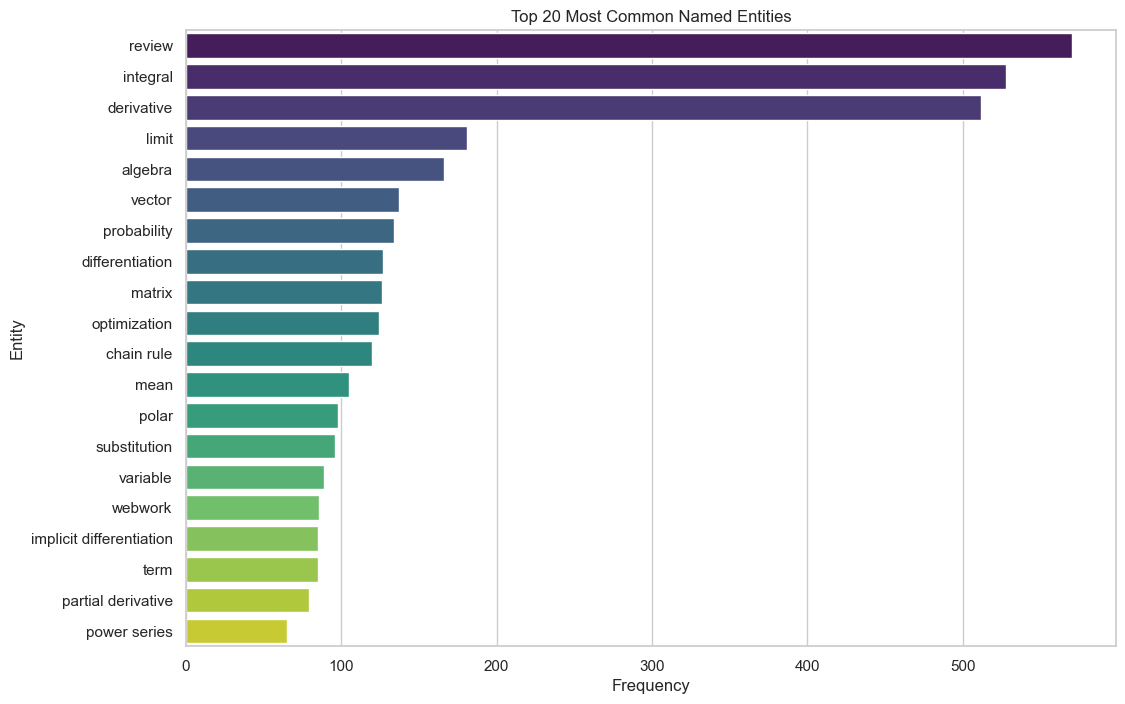

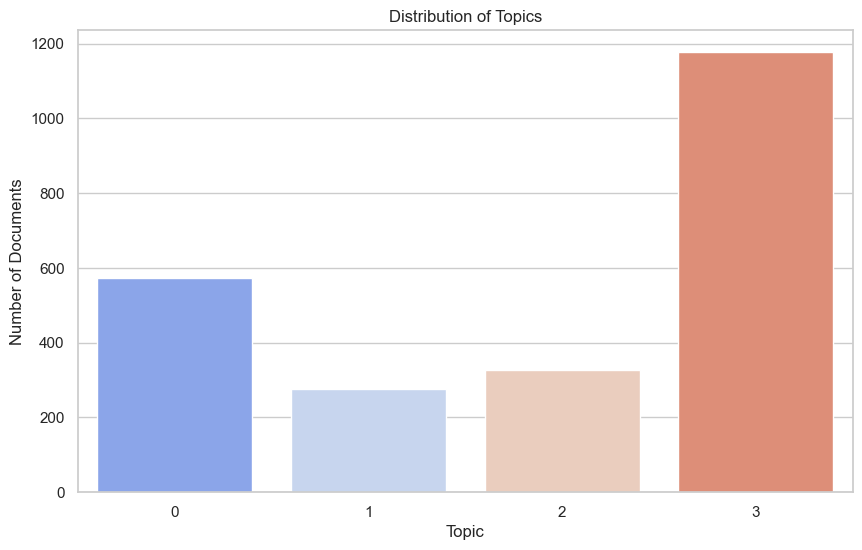

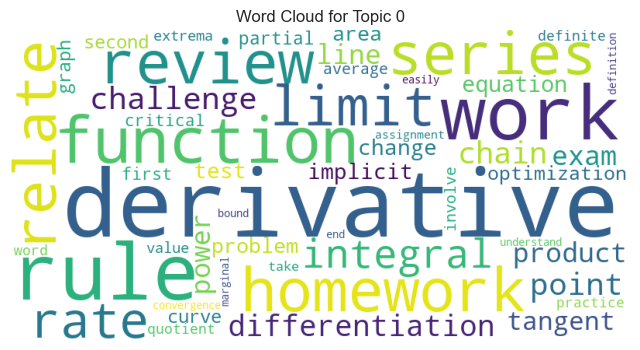

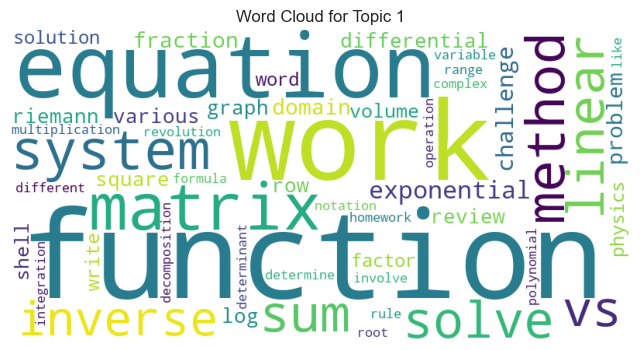

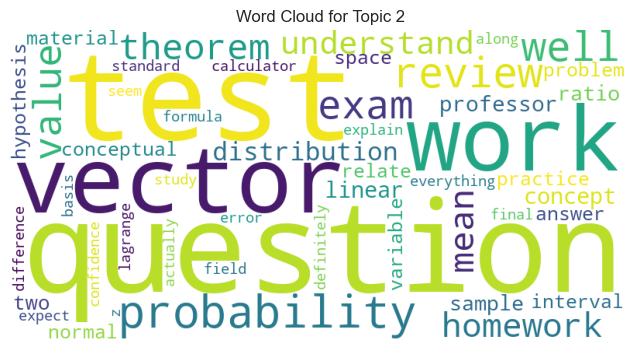

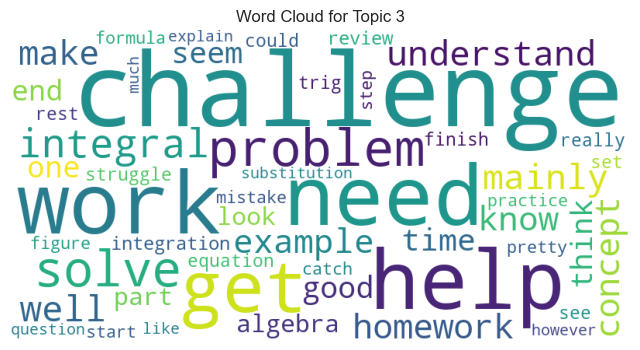

In [32]:
sns.set_theme(style="whitegrid")

if not concept_frequencies_df.empty:
    plt.figure(figsize=(12, 8))
    top_entities = concept_frequencies_df.nlargest(20, 'Frequency')
    sns.barplot(x='Frequency', y='Concept', data=top_entities, palette='viridis')
    plt.title('Top 20 Most Common Named Entities')
    plt.xlabel('Frequency')
    plt.ylabel('Entity')
    plt.show()
else:
    print("entity_df is empty, skipping entity frequency plot.")

if not topic_counts.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Topic', y='Count', data=topic_counts, palette='coolwarm')
    plt.title('Distribution of Topics')
    plt.xlabel('Topic')
    plt.ylabel('Number of Documents')
    plt.show()
else:
    print("topic_counts is empty, skipping topic distribution plot.")

def plot_wordcloud(model, topic_num):
    try:
        topic_words = model.show_topic(topic_num, 50)
        if not topic_words:
            print(f"Topic {topic_num} has no words.")
            return
        plt.figure(figsize=(8, 6))
        plt.imshow(WordCloud(background_color='white', max_words=50, width=800, height=400).fit_words(dict(topic_words)))
        plt.axis('off')
        plt.title(f'Word Cloud for Topic {topic_num}')
        plt.show()
    except Exception as e:
        print(f"Error generating word cloud for Topic {topic_num}: {e}")

for t in range(num_topics):
    plot_wordcloud(lda_model, t)


This code downloads the VADER lexicon using NLTK. The VADER lexicon supports sentiment analysis by providing a pre-built dictionary for evaluating positive, negative, and neutral sentiments. This resource is essential for sentiment analysis tasks.

In [33]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kzanc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

This code creates a new DataFrame, data, and initializes it with the text column from an existing DataFrame, dfdf. It ensures all the values in data are converted to strings using the astype(str) method, which is useful for handling non-string types and ensuring uniformity for text processing tasks.

In [34]:
data = pd.DataFrame()
data['text'] = dfdf['text'] 
data = data.astype(str)

This code defines a function, explain_clusters, that provides both visual and textual explanations of word clusters generated by a Word2Vec model and KMeans clustering. It ensures the dimensions of the inputs (reduced_dim, words, and clusters) match, raising an error if they do not. The function creates a DataFrame containing the reduced 2D coordinates (reduced_dim), corresponding words, and their cluster assignments.

Using this data, it generates a scatter plot with Seaborn, where points are colored based on their cluster, allowing for a visual inspection of how words are grouped. The plot is annotated with cluster titles and uses a distinct palette for clarity.

Additionally, the function performs a basic analysis of the clusters by identifying and printing the first couple of words from each cluster as a textual summary. This dual representation of the clusters—graphical and textual—provides insights into the clustering results, helping users understand the composition and structure of the clusters.

In [35]:
from gensim.utils import simple_preprocess
def explain_clusters(w2v_model, kmeans, reduced_dim, words, clusters, sample_size=20):
    """
    Explain and visualize clusters with sample words annotated in the plot.
    """
    if len(reduced_dim) != len(words) or len(words) != len(clusters):
        print(f"Lengths: reduced_dim={len(reduced_dim)}, words={len(words)}, clusters={len(clusters)}")
        raise ValueError("Lengths of reduced_dim, words, and clusters must match.")

    cluster_df = pd.DataFrame({
        'x': reduced_dim[:, 0],
        'y': reduced_dim[:, 1],
        'word': words,
        'cluster': clusters
    })

    plt.figure(figsize=(14, 10))
    sns.scatterplot(x="x", y="y", hue="cluster", data=cluster_df, palette="tab10", legend="full")
    plt.title("Word Clustering with Annotations (Word2Vec + KMeans)")

    plt.show()

This code defines two functions, visualize_clusters_per_group and analyze_and_visualize_clusters, to analyze and visualize word clusters derived from a word embedding model. The visualize_clusters_per_group function generates scatterplots for each unique cluster in the provided DataFrame cluster_df, using x and y coordinates for plotting and assigning colors to clusters. The function adjusts axis limits dynamically and annotates a limited number of words (determined by sample_size) to reduce visual clutter. Annotated words are displayed on the plot and printed as part of a summary for each cluster, while clusters with fewer than two points are skipped to avoid meaningless visualizations.

The analyze_and_visualize_clusters function integrates the clustering analysis by taking inputs such as the word embedding model (w2v_model), clustering results (kmeans), reduced dimensions (reduced_dim), word list (words), and cluster labels (clusters). It validates that the lengths of these inputs match, ensuring alignment between the reduced dimensions, words, and cluster assignments. The function creates a DataFrame (cluster_df) containing the coordinates, cluster labels, and word names, then calculates a summary of each cluster by determining its size and listing up to num_words from the cluster. It prints the cluster summary and calls visualize_clusters_per_group to generate detailed visualizations for each cluster. This code provides a comprehensive framework for analyzing and visualizing word clusters, combining clustering results with dimensionality reduction techniques (e.g., t-SNE or PCA) for interpretability and effective communication of patterns in the embedding space.

In [36]:
def visualize_clusters_per_group(cluster_df, sample_size=20):
    """
    Generate improved scatterplots for each cluster with proper axis scaling and limited annotations.
    """
    annotated_words = []
    for cluster in cluster_df['cluster'].unique():
        subset = cluster_df[cluster_df['cluster'] == cluster]
        
        if len(subset) < 2:
            print(f"Cluster {cluster} has fewer than 2 points. Skipping visualization.")
            continue

        plt.figure(figsize=(10, 7))
        sns.scatterplot(
            x=subset['x'], 
            y=subset['y'], 
            color=sns.color_palette("tab10")[cluster % 10], 
            legend=False, 
            s=80  
        )
        
        x_min, x_max = subset['x'].min() - 0.5, subset['x'].max() + 0.5
        y_min, y_max = subset['y'].min() - 0.5, subset['y'].max() + 0.5
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        
        # Annotate a subset of words to reduce clutter
        cluster_subset = subset.sample(n=min(sample_size, len(subset)), random_state=42)
        for _, row in cluster_subset.iterrows():
            plt.text(
                row['x'] + 0.3, row['y'] + 0.3, row['word'], 
                fontsize=9, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', alpha=0.2)
            )
            annotated_words.append({'cluster': cluster, 'word': row['word']})
        annotated_df = pd.DataFrame(annotated_words)
        
        # Filter and print words for the current cluster
        cluster_words_df = annotated_df[annotated_df['cluster'] == cluster]
        print(f"Cluster {cluster} Words:")
        print(cluster_words_df, "\n")
        
        plt.title(f"Cluster {cluster}: Scatterplot with Annotations", fontsize=14)
        plt.xlabel("t-SNE Dimension 1", fontsize=12)
        plt.ylabel("t-SNE Dimension 2", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()



def analyze_and_visualize_clusters(w2v_model, kmeans, reduced_dim, words, clusters, num_words=20):
    """
    Analyze clusters and visualize each cluster individually.
    """
    if len(reduced_dim) != len(words) or len(words) != len(clusters):
        print(f"Lengths: reduced_dim={len(reduced_dim)}, words={len(words)}, clusters={len(clusters)}")
        raise ValueError("Lengths of reduced_dim, words, and clusters must match.")
    
    cluster_df = pd.DataFrame({
        'x': reduced_dim[:, 0],
        'y': reduced_dim[:, 1],
        'word': words,
        'cluster': clusters
    })

    cluster_summary = []
    for cluster_id in sorted(cluster_df['cluster'].unique()):
        cluster_words = cluster_df[cluster_df['cluster'] == cluster_id]['word']
        cluster_size = len(cluster_words)
        top_words = cluster_words.head(num_words).tolist() 
        cluster_summary.append({
            'Cluster': cluster_id,
            'Size': cluster_size,
            'Top Words': ", ".join(top_words)
        })
    
    cluster_summary_df = pd.DataFrame(cluster_summary)
    
    print("\nCluster Summary:")
    print(cluster_summary_df.to_string(index=False))
    
    visualize_clusters_per_group(cluster_df, sample_size=20)

    return cluster_summary_df

This code defines the word_embedding_clustering function, which generates Word2Vec embeddings for a given text dataset, performs KMeans clustering on the resulting word vectors, and visualizes and analyzes the clusters. The function begins by tokenizing the input text data using the simple_preprocess method, filtering out non-string entries and ensuring only valid tokens are included. A Word2Vec model is trained on the tokenized data with a minimum word frequency of 2, creating embeddings for words in the dataset.

The word vectors generated by the Word2Vec model are extracted and used as input for KMeans clustering, which groups the words into a specified number of clusters (num_clusters). To visualize the clustering results in a 2D space, the function applies t-SNE dimensionality reduction to the word vectors, ensuring the perplexity parameter is dynamically adjusted based on the dataset size.

The function then calls explain_clusters to provide insights into the clusters and leverages the analyze_and_visualize_clusters function to summarize and visualize the clusters, including scatterplots and textual summaries of the most representative words in each cluster. Finally, the trained Word2Vec model and KMeans clustering model are returned for further use. This function streamlines the process of creating word embeddings, clustering words, and interpreting the results through visualization and analysis.

In [37]:
def word_embedding_clustering(text_data, num_clusters=7):
    """
    Create Word2Vec embeddings and perform KMeans clustering.
    """
    tokenized_data = text_data.apply(lambda x: simple_preprocess(x) if isinstance(x, str) else [])
    tokenized_data = [tokens for tokens in tokenized_data if tokens]

    w2v_model = gensim.models.Word2Vec(sentences=tokenized_data, min_count=2, workers=4)

    word_vectors = w2v_model.wv
    words = list(word_vectors.index_to_key)
    X = word_vectors[words] 

    kmeans = KMeans(n_clusters=min(num_clusters, len(words)), random_state=42)
    clusters = kmeans.fit_predict(X)

    tsne_perplexity = min(30, len(words) - 1) 
    tsne = TSNE(n_components=2, perplexity=tsne_perplexity, random_state=42)
    reduced_dim = tsne.fit_transform(X)

    explain_clusters(w2v_model, kmeans, reduced_dim, words, clusters)
    
    cluster_summary = analyze_and_visualize_clusters(
    w2v_model=w2v_model,
    kmeans=kmeans,
    reduced_dim=tsne.fit_transform(X),
    words=words,
    clusters=kmeans.labels_
    )

    return w2v_model, kmeans


This code applies the word_embedding_clustering function to preprocessed text data, generating Word2Vec embeddings and clustering the words into six clusters using KMeans. The resulting models, w2v_model (Word2Vec) and kmeans_model (KMeans), capture semantic relationships and grouping patterns in the text.

c:\Users\kzanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


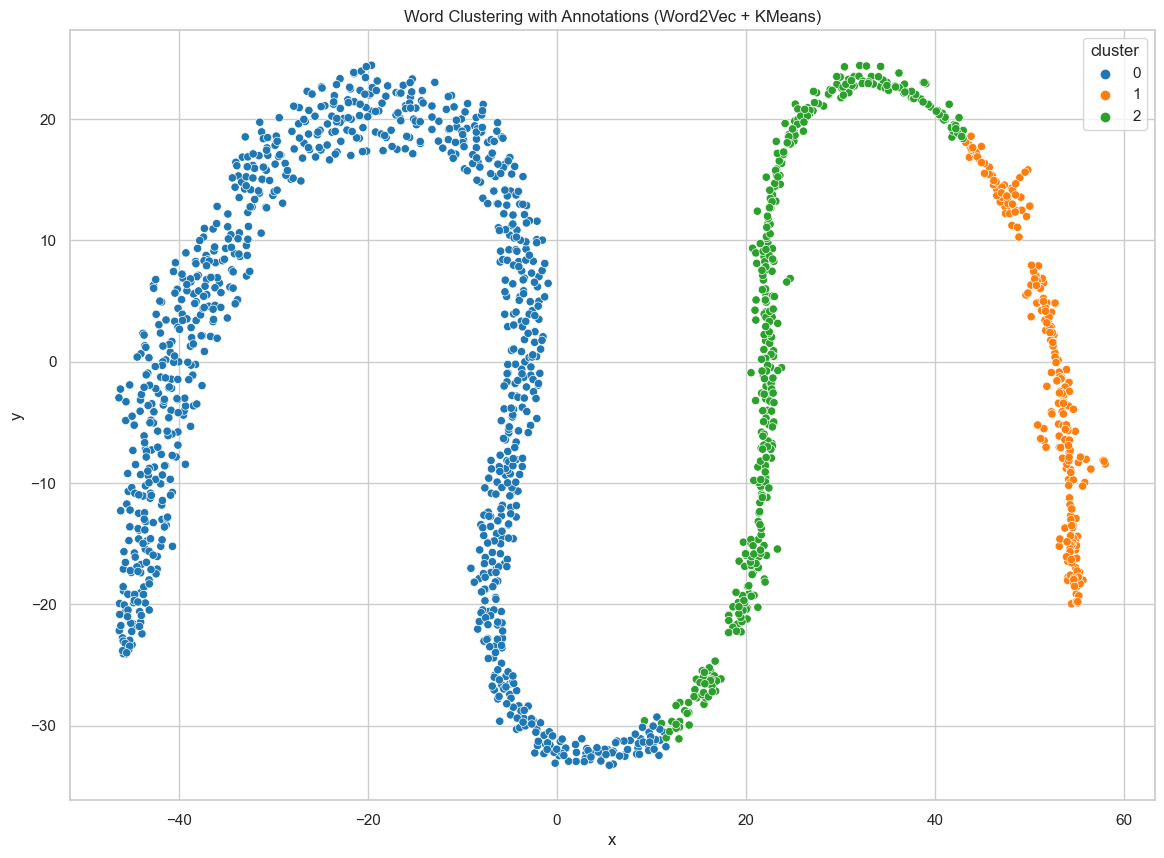


Cluster Summary:
 Cluster  Size                                                                                                                                                                                       Top Words
       0   933 extreme, currently, primarily, clear, related, density, logarithmic, inflection, instantaneous, eventually, enough, quick, turn, original, indefinite, new, linearization, diverge, ex, context
       1   216                             work, challenge, need, help, problem, homework, review, integral, solve, derivative, function, get, well, rule, understand, equation, concept, question, exam, test
       2   365                         upcoming, average, triple, definite, quotient, without, require, couple, multiple, domain, double, ratio, log, improper, correctly, cylindrical, bring, week, arc, plug
Cluster 1 Words:
    cluster           word
0         1           base
1         1           hour
2         1       fraction
3         1         normal
4 

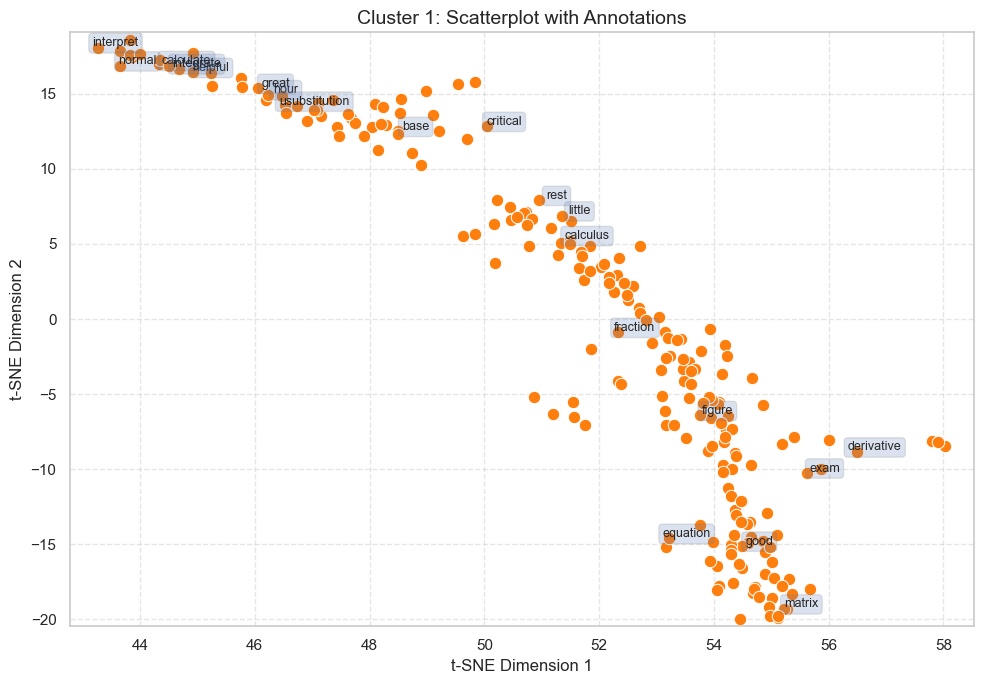

Cluster 2 Words:
    cluster            word
20        2      constraint
21        2        absolute
22        2     cylindrical
23        2          median
24        2  multiplication
25        2         variety
26        2     determinant
27        2        triangle
28        2          growth
29        2         complex
30        2           email
31        2        gradient
32        2          versus
33        2          regard
34        2            many
35        2        strategy
36        2        upcoming
37        2       necessary
38        2           datum
39        2            even 



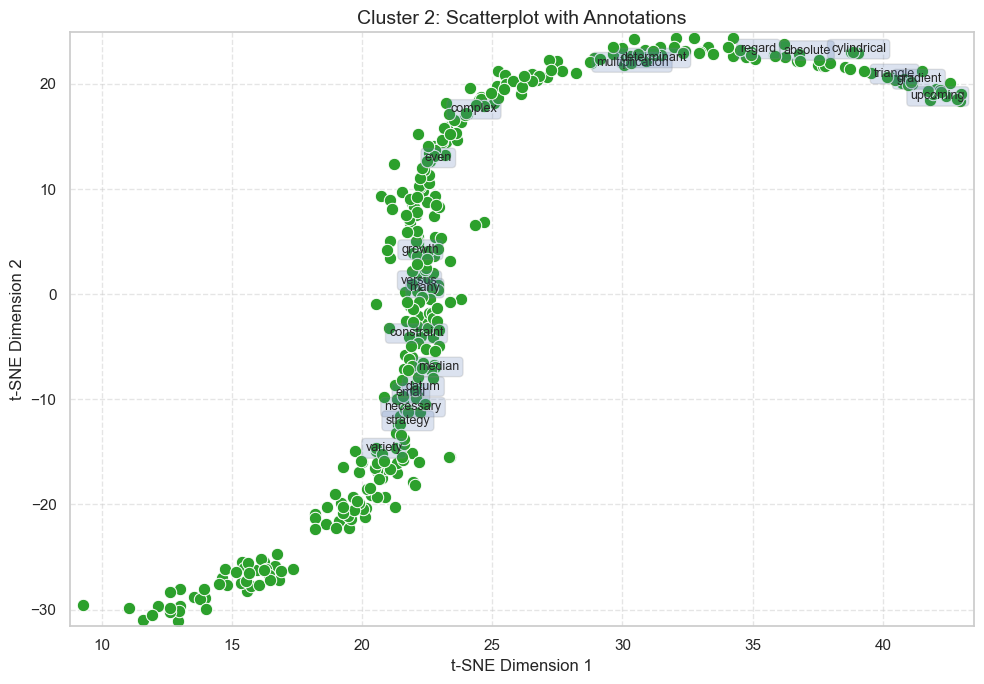

Cluster 0 Words:
    cluster         word
40        0   unpleasant
41        0      minimum
42        0      explore
43        0        exact
44        0          lct
45        0       reduce
46        0       noshow
47        0   orthogonal
48        0         spot
49        0     emphasis
50        0   experiment
51        0      crucial
52        0       credit
53        0   expression
54        0        honor
55        0        round
56        0    factoring
57        0     momentum
58        0  demonstrate
59        0      receive 



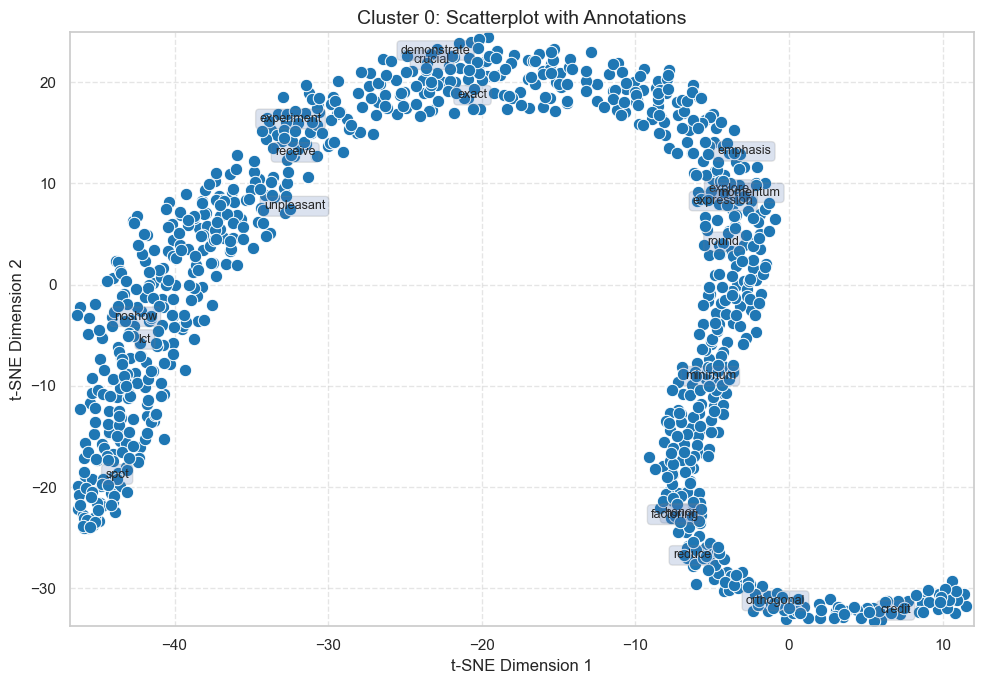

In [38]:
num_clusters = 3
w2v_model, kmeans_model = word_embedding_clustering(data['text'].apply(preprocess_text2), num_clusters=num_clusters)

Use same process as before, but change Word2vec model from CBOW to SG. CBOW (Continuous Bag-of-Words Model) utilizes a training framework of predicting the targeted word based on a context window around that word. SG (Skip Gram Model) utilizes a training framework of predicting the context window based on the targeted word. Generally, SG models are used for smaller datasets with more contextual diversity. CBOW is used for larger datasets with higher word frequencies.

In [39]:
def explain_clusters(w2v_model, kmeans, reduced_dim, words, clusters, sample_size=20):
    """
    Explain and visualize clusters with sample words annotated in the plot.
    """
    if len(reduced_dim) != len(words) or len(words) != len(clusters):
        print(f"Lengths: reduced_dim={len(reduced_dim)}, words={len(words)}, clusters={len(clusters)}")
        raise ValueError("Lengths of reduced_dim, words, and clusters must match.")

    cluster_df = pd.DataFrame({
        'x': reduced_dim[:, 0],
        'y': reduced_dim[:, 1],
        'word': words,
        'cluster': clusters
    })

    plt.figure(figsize=(14, 10))
    sns.scatterplot(x="x", y="y", hue="cluster", data=cluster_df, palette="tab10", legend="full")
    plt.title("Word Clustering with Annotations (Word2Vec + KMeans)")

    plt.show()

def visualize_clusters_per_group(cluster_df, sample_size=20):
    """
    Generate improved scatterplots for each cluster with proper axis scaling and limited annotations.
    """
    annotated_words = []
    for cluster in cluster_df['cluster'].unique():
        subset = cluster_df[cluster_df['cluster'] == cluster]
        
        if len(subset) < 2:
            print(f"Cluster {cluster} has fewer than 2 points. Skipping visualization.")
            continue

        plt.figure(figsize=(10, 7))
        sns.scatterplot(
            x=subset['x'], 
            y=subset['y'], 
            color=sns.color_palette("tab10")[cluster % 10], 
            legend=False, 
            s=80  
        )
        
        x_min, x_max = subset['x'].min() - 0.5, subset['x'].max() + 0.5
        y_min, y_max = subset['y'].min() - 0.5, subset['y'].max() + 0.5
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        
        # Annotate a subset of words to reduce clutter
        cluster_subset = subset.sample(n=min(sample_size, len(subset)), random_state=42)
        for _, row in cluster_subset.iterrows():
            plt.text(
                row['x'] + 0.3, row['y'] + 0.3, row['word'], 
                fontsize=9, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', alpha=0.2)
            )
            annotated_words.append({'cluster': cluster, 'word': row['word']})
        annotated_df = pd.DataFrame(annotated_words)
        
        # Filter and print words for the current cluster
        cluster_words_df = annotated_df[annotated_df['cluster'] == cluster]
        print(f"Cluster {cluster} Words:")
        print(cluster_words_df, "\n")
        plt.title(f"Cluster {cluster}: Scatterplot with Annotations", fontsize=14)
        plt.xlabel("t-SNE Dimension 1", fontsize=12)
        plt.ylabel("t-SNE Dimension 2", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

def analyze_and_visualize_clusters(w2v_model, kmeans, reduced_dim, words, clusters, num_words=20):
    """
    Analyze clusters and visualize each cluster individually.
    """
    if len(reduced_dim) != len(words) or len(words) != len(clusters):
        print(f"Lengths: reduced_dim={len(reduced_dim)}, words={len(words)}, clusters={len(clusters)}")
        raise ValueError("Lengths of reduced_dim, words, and clusters must match.")
    
    cluster_df = pd.DataFrame({
        'x': reduced_dim[:, 0],
        'y': reduced_dim[:, 1],
        'word': words,
        'cluster': clusters
    })

    cluster_summary = []
    for cluster_id in sorted(cluster_df['cluster'].unique()):
        cluster_words = cluster_df[cluster_df['cluster'] == cluster_id]['word']
        cluster_size = len(cluster_words)
        top_words = cluster_words.head(num_words).tolist() 
        cluster_summary.append({
            'Cluster': cluster_id,
            'Size': cluster_size,
            'Top Words': ", ".join(top_words)
        })
    
    cluster_summary_df = pd.DataFrame(cluster_summary)
    
    print("\nCluster Summary:")
    print(cluster_summary_df.to_string(index=False))
    
    visualize_clusters_per_group(cluster_df, sample_size=20)

    return cluster_summary_df

def word_embedding_clustering_skip(text_data, num_clusters=7):
    """
    Create Word2Vec embeddings and perform KMeans clustering.
    """
    tokenized_data = text_data.apply(lambda x: simple_preprocess(x) if isinstance(x, str) else [])
    tokenized_data = [tokens for tokens in tokenized_data if tokens]

    w2v_model = gensim.models.Word2Vec(sentences=tokenized_data, min_count=2, workers=4,sg=1)

    word_vectors = w2v_model.wv
    words = list(word_vectors.index_to_key)
    X = word_vectors[words] 

    kmeans = KMeans(n_clusters=min(num_clusters, len(words)), random_state=42)
    clusters = kmeans.fit_predict(X)

    tsne_perplexity = min(30, len(words) - 1) 
    tsne = TSNE(n_components=2, perplexity=tsne_perplexity, random_state=42)
    reduced_dim = tsne.fit_transform(X)

    explain_clusters(w2v_model, kmeans, reduced_dim, words, clusters)
    
    cluster_summary = analyze_and_visualize_clusters(
    w2v_model=w2v_model,
    kmeans=kmeans,
    reduced_dim=tsne.fit_transform(X),
    words=words,
    clusters=kmeans.labels_
    )

    return w2v_model, kmeans

c:\Users\kzanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


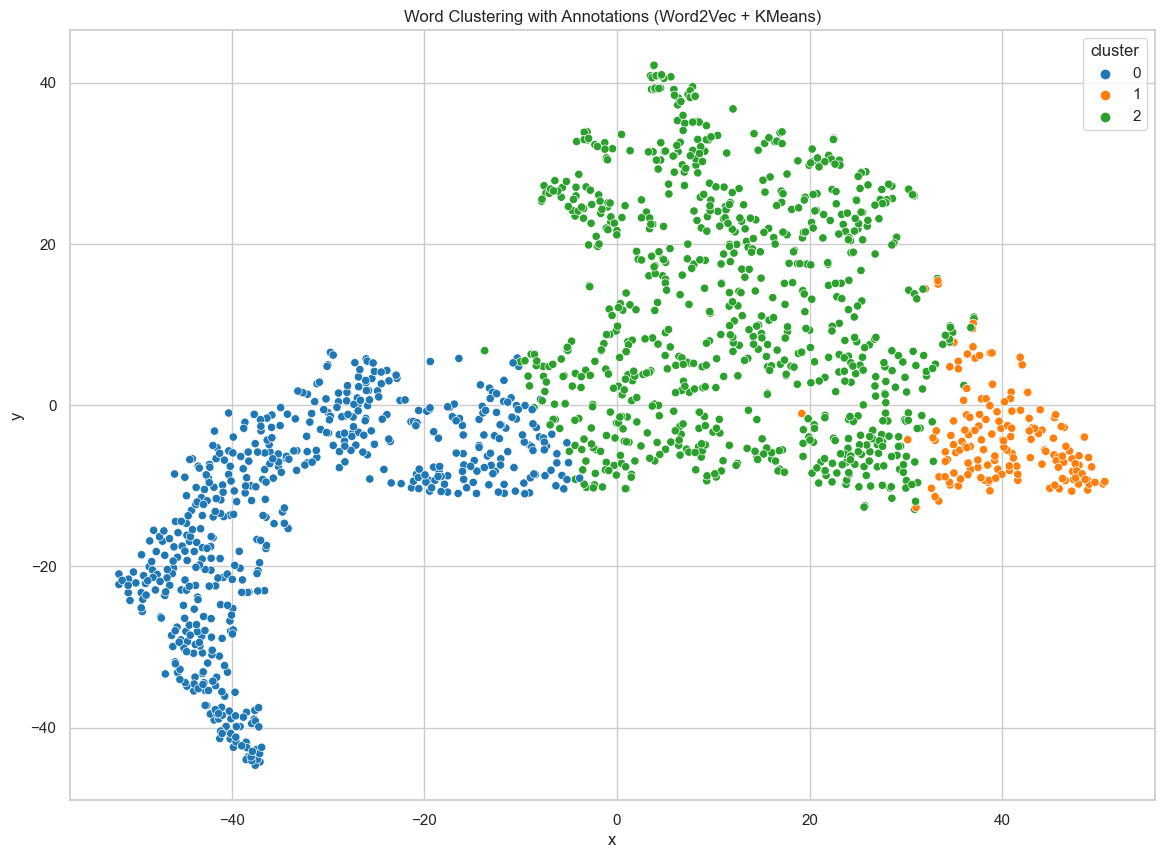


Cluster Summary:
 Cluster  Size                                                                                                                                                          Top Words
       0   548 count, enclose, true, fx, worksheet, ability, chapter, involved, composite, webassign, teacher, hw, gaussian, arclength, speed, fxy, torque, technical, home, alek
       1   157             challenge, need, help, problem, homework, solve, get, well, understand, concept, question, mainly, know, make, example, seem, end, practice, one, time
       2   809           work, review, integral, derivative, function, rule, equation, exam, test, relate, formula, series, set, limit, point, value, different, area, rate, line
Cluster 2 Words:
    cluster         word
0         2         ball
1         2      compute
2         2     evaluate
3         2    intuition
4         2      pertain
5         2         onto
6         2      provide
7         2  explanation
8         2        might
9  

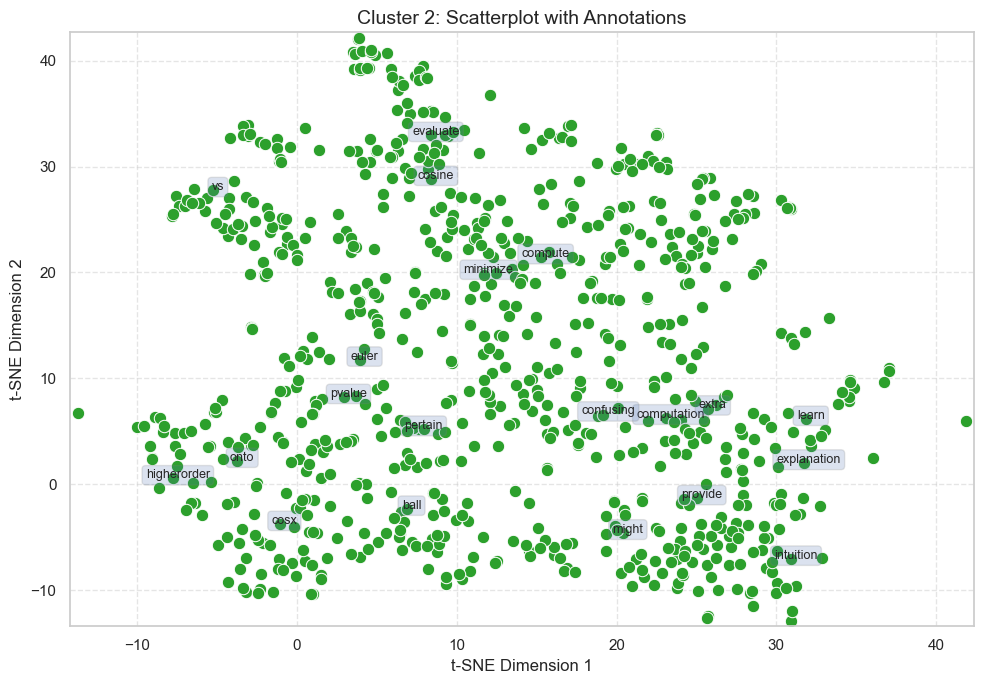

Cluster 1 Words:
    cluster           word
20        1           keep
21        1  understanding
22        1      perfectly
23        1      sometimes
24        1       progress
25        1       struggle
26        1         mostly
27        1      correctly
28        1          trick
29        1          fully
30        1           time
31        1         little
32        1           seem
33        1            try
34        1        algebra
35        1        explain
36        1    calculation
37        1       prepared
38        1           bale
39        1        overall 



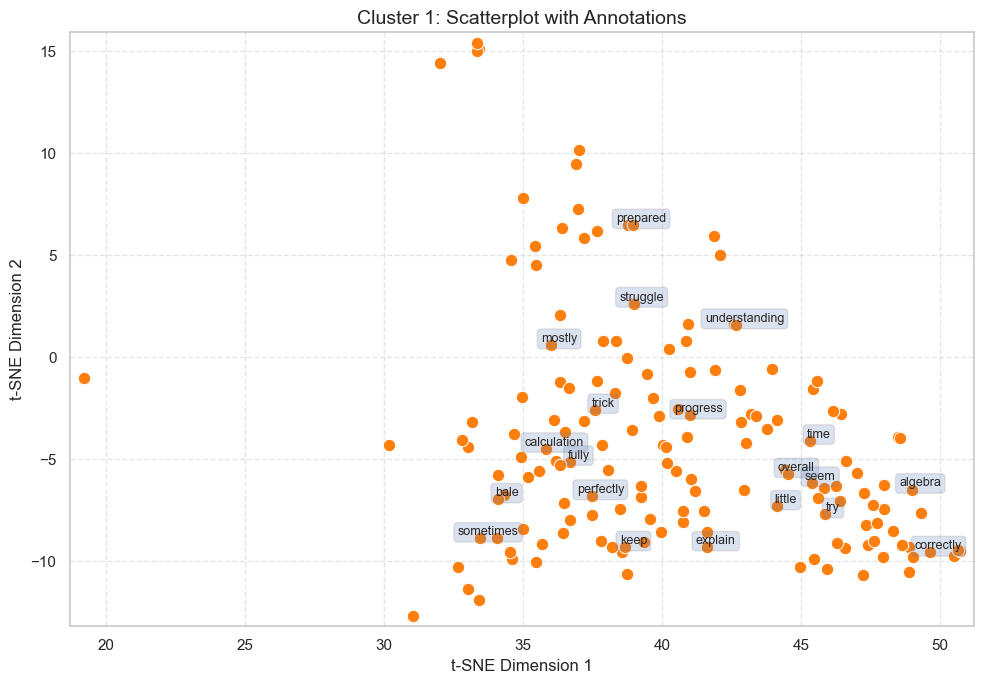

Cluster 0 Words:
    cluster          word
40        0       explore
41        0          wrap
42        0          edge
43        0          iron
44        0     translate
45        0   parenthesis
46        0  accumulation
47        0           lct
48        0          slow
49        0        memory
50        0      mclaurin
51        0       chapter
52        0       benefit
53        0    foundation
54        0        thirty
55        0           fit
56        0        former
57        0    eigenspace
58        0         steep
59        0       flatten 



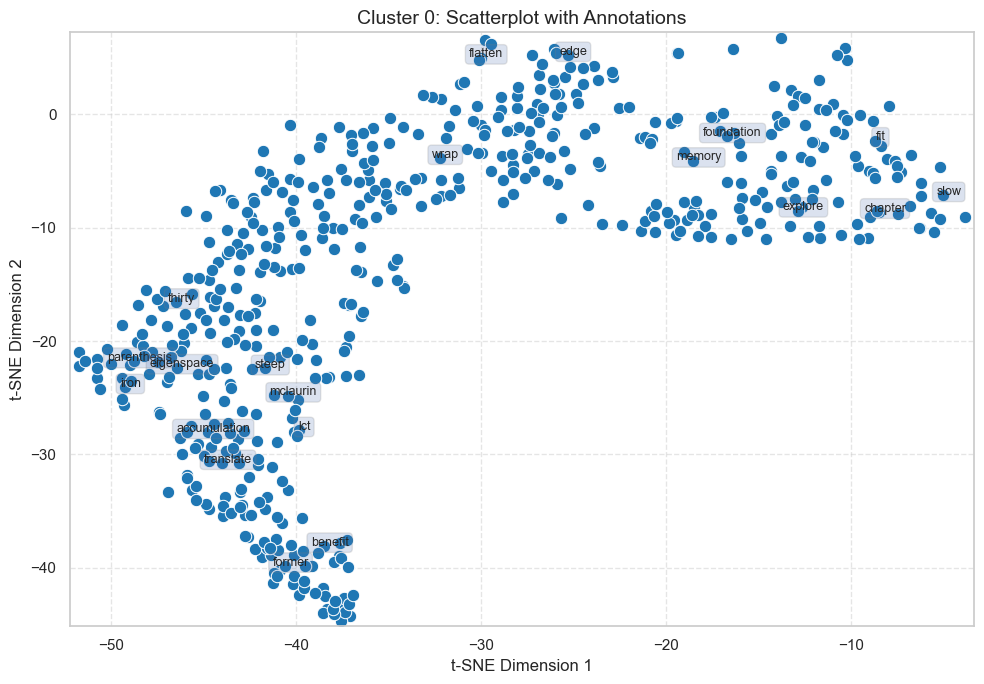

In [40]:
num_clusters = 3
w2v_model, kmeans_model = word_embedding_clustering_skip(data['text'].apply(preprocess_text2), num_clusters=num_clusters)

Uses the same process as before, except this is using UMAP for dimension reduction instead of TSNE. Thsi still uses SG as the Word2Vec model. 

In [41]:
import umap.umap_ as umap

def explain_clusters(w2v_model, kmeans, reduced_dim, words, clusters, sample_size=20):
    """
    Explain and visualize clusters with sample words annotated in the plot.
    """
    if len(reduced_dim) != len(words) or len(words) != len(clusters):
        print(f"Lengths: reduced_dim={len(reduced_dim)}, words={len(words)}, clusters={len(clusters)}")
        raise ValueError("Lengths of reduced_dim, words, and clusters must match.")

    cluster_df = pd.DataFrame({
        'x': reduced_dim[:, 0],
        'y': reduced_dim[:, 1],
        'word': words,
        'cluster': clusters
    })

    plt.figure(figsize=(14, 10))
    sns.scatterplot(x="x", y="y", hue="cluster", data=cluster_df, palette="tab10", legend="full")
    plt.title("Word Clustering with Annotations (Word2Vec + KMeans)")

    plt.show()

def visualize_clusters_per_group(cluster_df, sample_size=20):
    """
    Visualize clusters with consistent colors across global and individual plots
    and export a DataFrame summarizing cluster words.
    """
    annotated_words = []
    
    # Create a consistent color palette for all clusters
    unique_clusters = sorted(cluster_df['cluster'].unique())
    cluster_color_map = {cluster: sns.color_palette("tab10", n_colors=len(unique_clusters))[i] 
                         for i, cluster in enumerate(unique_clusters)}

    for cluster in unique_clusters:
        subset = cluster_df[cluster_df['cluster'] == cluster]
        
        # Visualize each cluster with its consistent color
        plt.figure(figsize=(10, 7))
        sns.scatterplot(
            x="x", y="y", data=subset, 
            color=cluster_color_map[cluster], s=80  # Use consistent color
        )
        
        plt.title(f"Cluster {cluster}: Scatterplot with Annotations", fontsize=14)
        plt.xlabel("UMAP Dimension 1", fontsize=12)
        plt.ylabel("UMAP Dimension 2", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)

        # Annotate a random sample of words in the cluster
        sampled_subset = subset.sample(n=min(sample_size, len(subset)), random_state=42)
        for _, row in sampled_subset.iterrows():
            plt.text(
                row['x'] + 0.1, row['y'] + 0.1, 
                row['word'], fontsize=9, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', alpha=0.2)
            )
            # Collect annotated words for the DataFrame
            annotated_words.append({'cluster': cluster, 'word': row['word']})

        # Create a DataFrame summarizing annotated words for each cluster
        annotated_df = pd.DataFrame(annotated_words)
        
        # Filter and print words for the current cluster
        cluster_words_df = annotated_df[annotated_df['cluster'] == cluster]
        print(f"Cluster {cluster} Words:")
        print(cluster_words_df, "\n")
        plt.tight_layout()
        plt.show()

   
    
def analyze_and_visualize_clusters(w2v_model, kmeans, reduced_dim, words, clusters, num_words=20):
    """
    Analyze clusters and visualize each cluster individually.
    """
    if len(reduced_dim) != len(words) or len(words) != len(clusters):
        print(f"Lengths: reduced_dim={len(reduced_dim)}, words={len(words)}, clusters={len(clusters)}")
        raise ValueError("Lengths of reduced_dim, words, and clusters must match.")
    
    cluster_df = pd.DataFrame({
        'x': reduced_dim[:, 0],
        'y': reduced_dim[:, 1],
        'word': words,
        'cluster': clusters
    })

    cluster_summary = []
    for cluster_id in sorted(cluster_df['cluster'].unique()):
        cluster_words = cluster_df[cluster_df['cluster'] == cluster_id]['word']
        cluster_size = len(cluster_words)
        top_words = cluster_words.head(num_words).tolist() 
        cluster_summary.append({
            'Cluster': cluster_id,
            'Size': cluster_size,
            'Top Words': ", ".join(top_words)
        })
    
    cluster_summary_df = pd.DataFrame(cluster_summary)
    
    print("\nCluster Summary:")
    print(cluster_summary_df.to_string(index=False))
    
    visualize_clusters_per_group(cluster_df, sample_size=20)

    return cluster_summary_df

def word_embedding_clustering_umap(text_data, num_clusters=7):
    """
    Create Word2Vec embeddings and perform KMeans clustering.
    """
    tokenized_data = text_data.apply(lambda x: simple_preprocess(x) if isinstance(x, str) else [])
    tokenized_data = [tokens for tokens in tokenized_data if tokens]

    w2v_model = gensim.models.Word2Vec(sentences=tokenized_data, min_count=2, workers=4, sg=1)

    word_vectors = w2v_model.wv
    words = list(word_vectors.index_to_key)
    X = word_vectors[words] 

    kmeans = KMeans(n_clusters=min(num_clusters, len(words)), random_state=42)
    clusters = kmeans.fit_predict(X)

    umap_reducer = umap.UMAP(n_components=2, random_state=42)
    reduced_dim = umap_reducer.fit_transform(X)

    explain_clusters(w2v_model, kmeans, reduced_dim, words, clusters)
    
    cluster_summary = analyze_and_visualize_clusters(
        w2v_model=w2v_model,
        kmeans=kmeans,
        reduced_dim=reduced_dim,
        words=words,
        clusters=kmeans.labels_
    )

    return w2v_model, kmeans

c:\Users\kzanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kzanc\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


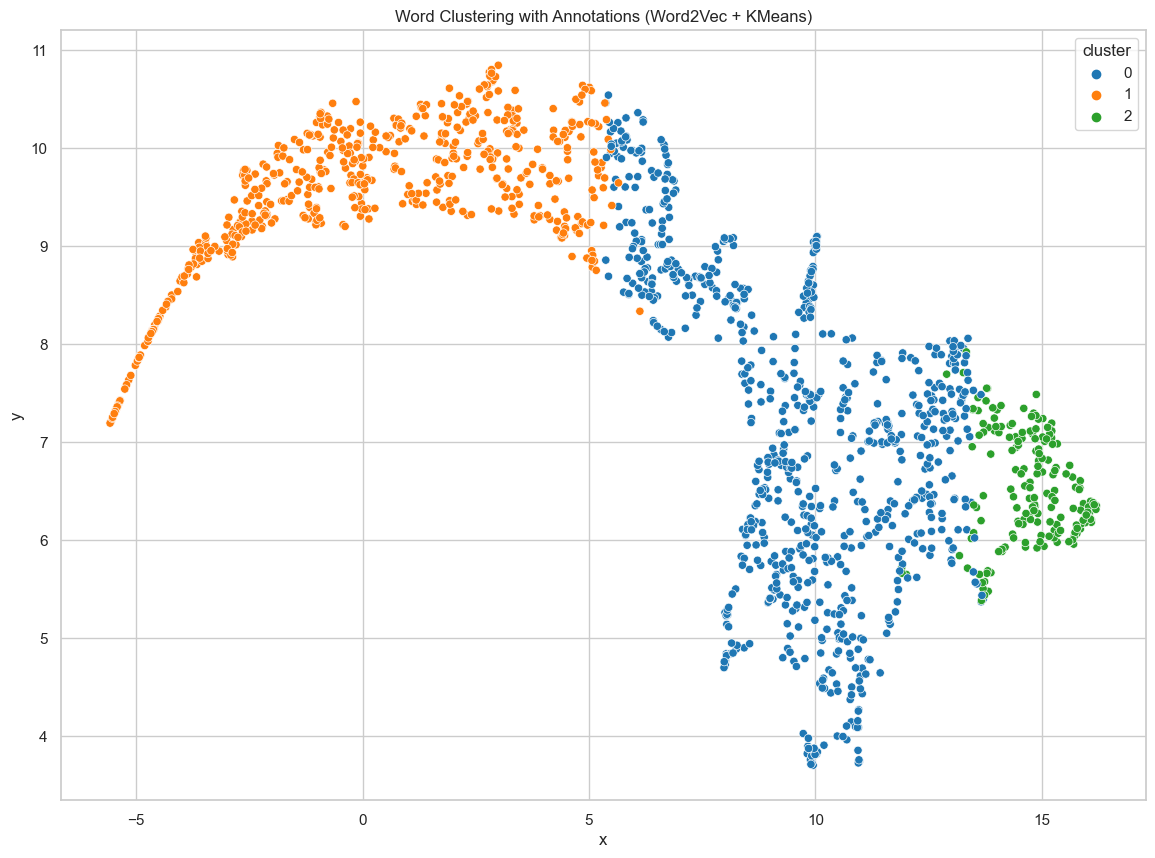


Cluster Summary:
 Cluster  Size                                                                                                                                                                  Top Words
       0   791                  work, review, integral, derivative, function, rule, equation, exam, test, relate, formula, series, limit, point, value, different, area, rate, line, trig
       1   542 enclose, textbook, relationship, true, fx, worksheet, ability, chapter, sinx, module, composite, delta, nullspace, hw, gaussian, unknown, arclength, inversion, speed, fxy
       2   181                     challenge, need, help, problem, homework, solve, get, well, understand, concept, question, mainly, know, make, example, seem, end, practice, one, time
Cluster 0 Words:
    cluster       word
0         0       axis
1         0       talk
2         0       fast
3         0      cross
4         0  something
5         0  principle
6         0      sense
7         0     median
8         0   

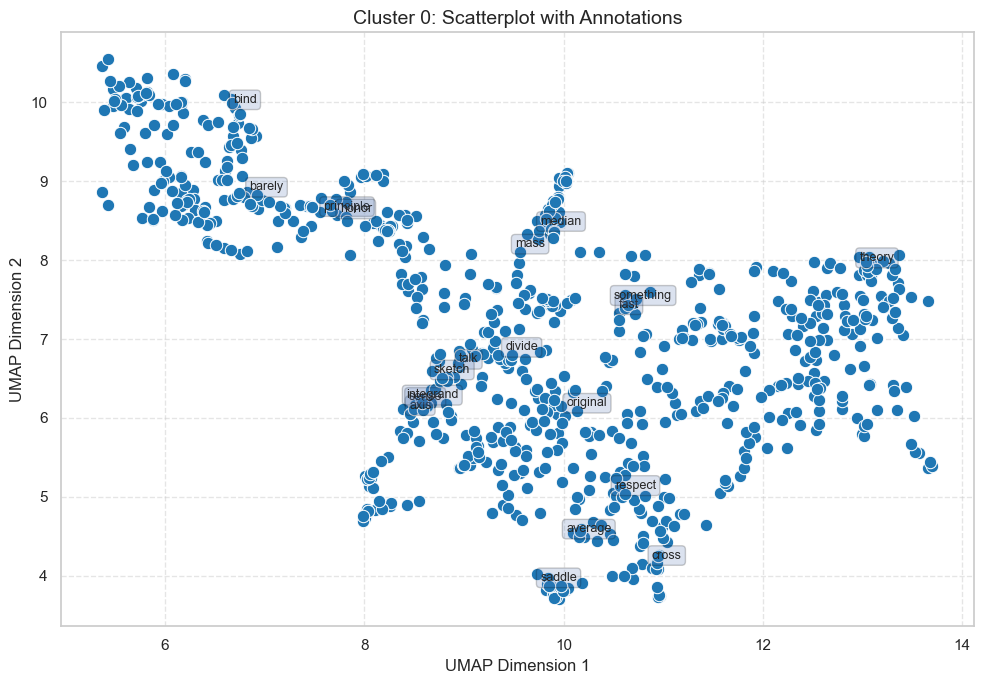

Cluster 1 Words:
    cluster             word
20        1           nearly
21        1             venn
22        1          replace
23        1          pitfall
24        1            verse
25        1         geometry
26        1         reminder
27        1              hit
28        1      parenthesis
29        1  productquotient
30        1          ability
31        1         recently
32        1      distinguish
33        1          arctanx
34        1          version
35        1             slow
36        1         weakness
37        1         geogebra
38        1        dependent
39        1              per 



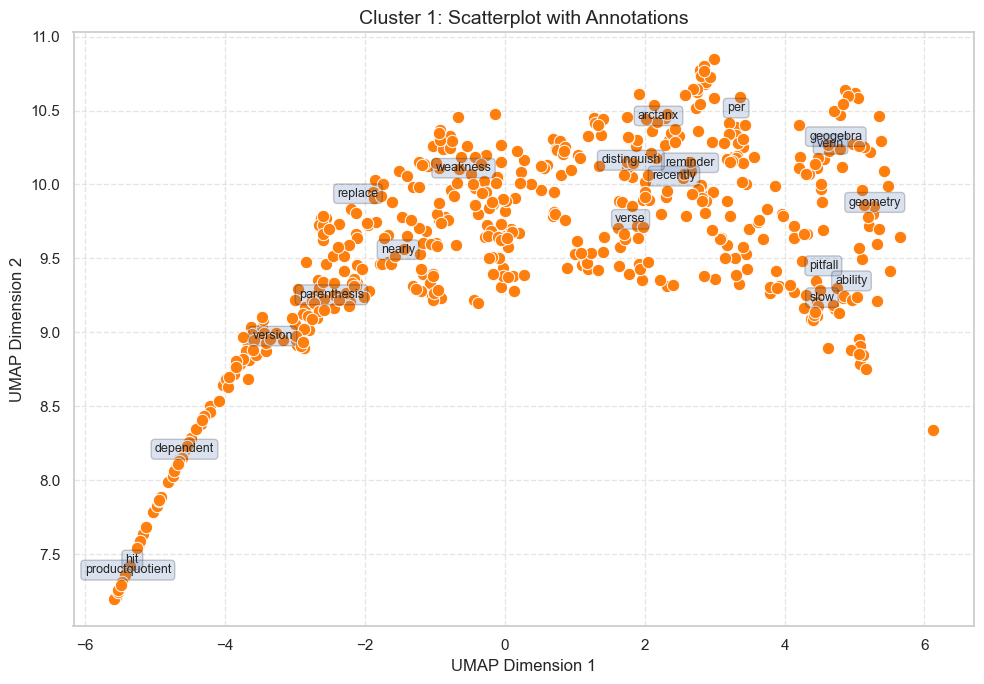

Cluster 2 Words:
    cluster       word
40        2       time
41        2     really
42        2       meet
43        2      thing
44        2       past
45        2       seem
46        2       look
47        2      issue
48        2     minute
49        2      skill
50        2  professor
51        2      quite
52        2      spend
53        2     entire
54        2   together
55        2        end
56        2  confident
57        2    pattern
58        2      trick
59        2    webwork 



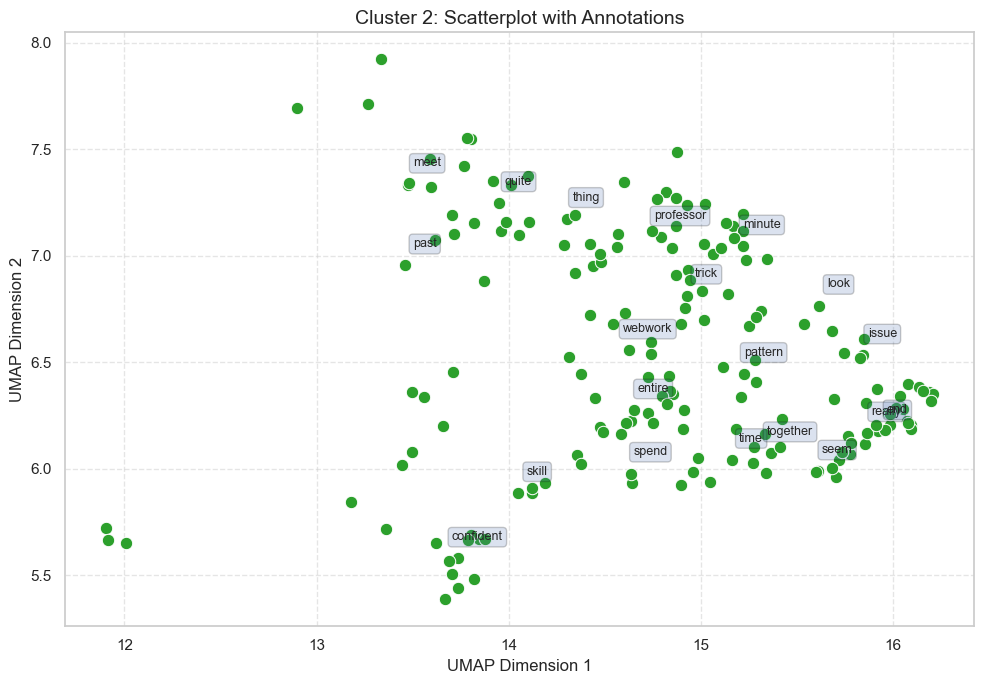

In [42]:
num_clusters = 3
w2v_model, kmeans_model = word_embedding_clustering_umap(data['text'].apply(preprocess_text2), num_clusters=num_clusters)

This code performs sentiment analysis on textual data using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool. For each text entry in the provided dataset, it calculates a compound sentiment score that ranges from -1 (most negative) to 1 (most positive). These scores are then added as a new column, sentiment, in the dataset. Additionally, the code visualizes the overall distribution of sentiment scores by plotting a histogram, which provides insights into the polarity and intensity of sentiments expressed in the dataset. The function returns the calculated sentiment scores for further analysis.

In [43]:
### Sentiment Analysis (VADER)
def sentiment_analysis(text_data):
    sid = SentimentIntensityAnalyzer()
    data['sentiment'] = text_data.apply(lambda x: sid.polarity_scores(x)['compound'])
    
    # Plot sentiment distribution
    plt.hist(data['sentiment'], bins=20)
    plt.title('Sentiment Distribution')
    plt.show()
    
    return data['sentiment']

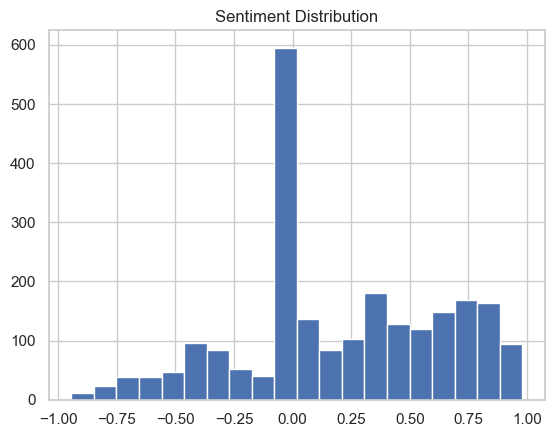

In [44]:
sentiment_scores = sentiment_analysis(data['text'].apply(preprocess_text2))

In [ ]:
### Do not run again, unless have new data to update the excel sheet
data['sentiment'] = sentiment_scores[:]

data.to_excel(r'C:\Users\kzanc\Honors Fellow Project\data_output.xlsx', sheet_name='Sheet1', index=True)

DON'T RUN THESE!!!! WILL TAKE AT LEAST 90 MINUTES TO RUN!!!

In [ ]:
### Abstractive Summarization using Hugging Face's BART
def abstractive_summarization(text_data, max_length=150, min_length=30):
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
    summaries = summarizer(text_data, max_length=max_length, min_length=min_length, do_sample=False)
    return [summary['summary_text'] for summary in summaries]

# Run Abstractive Summarization
data['abstractive_summary'] = data['text'].apply(lambda x: abstractive_summarization(x)[0])

In [ ]:
### Display Summaries
print("\n### Abstractive Summaries (BART):")
for i, summary in enumerate(data['abstractive_summary'].head(5)):
    print(f"Abstractive Summary {i+1}: {summary}\n")

In [ ]:
df_output

In [ ]:
df_output.columns

In [ ]:
df_time = df_output.groupby(by='Military_Time')

In [ ]:
df_time_sum = df_time[['Attend Bin',
       'Returner Bin', 'MAT 117', 'MAT 142', 'MAT 170', 'MAT 171', 'MAT 210',
       'MAT 211', 'MAT 242', 'MAT 243', 'MAT 251', 'MAT 265', 'MAT 266',
       'MAT 267', 'MAT 270', 'MAT 271', 'MAT 272', 'MAT 275', 'MAT 300',
       'MAT342_343', 'STP 226', 'STP 231', 'ECN 221_231', 'IEE 380', 'Other',
       'Working_HW_Encoded', 'Review_Course_Material_Encoded',
       'Prep_exam_encoded', 'Other_encoded', 'Stage1', 'Stage2', 'Stage3',
       'Stage4', 'Success1', 'Success2', 'Success3']].sum()

In [ ]:
df_time_sum.to_excel(r'C:\Users\kzanc\Honors Fellow Project\output_with_timegroupsum.xlsx', sheet_name='Sheet1', index=True)